# Fundamentals of Data Analysis 2021
---
### Sam Tracey
### December 2021
### Analysis of Level 8 CAO points 2019 / 2020 / 2021
---

In [1]:
# Import Necessary Python Libraries.

# Regular Expressions
import re
# Convenient HTTP Requests
import requests as rq
import csv
# Working with dataframes and data
import pandas as pd
# Efficient working with datetimes
import datetime as dt

import numpy as np
# Extracting.pdf tabular data from websites
import tabula


In [2]:
# Get The Current Date and Time
now = dt.datetime.now()

# Format as a string
nowstr =  now.strftime('%Y%m%d_%H%M%S')

# Section 1. Importing Data.

<br>

## Import CAO 2021 Points from .xlsx

Initially when we began this assignment, the 2021 CAO points were only available via the CAO website from a .php page. In late November 2021 the CAO updated this page and it now shows a .xlsx file to download. The .xlsx file has many extra fields when compared to the .php page which only contained the course code, title, Points 1 and Points 2. 

I decided to amend my code to read the .xlsx code as it would allow me to carry out more interesting and comprehensive analysis.

I also left the initial code to extract the data from the .php page below this but have commented it all out (it took me a long time to get it working properly using Regex and I'm proud of it!)

Reference: http://www2.cao.ie/points/CAOPointsCharts2021.xlsx

***

In [3]:
# Create a File Path for the Original Data
path2021 = 'data/cao2021_' + nowstr + '.csv'

In [4]:
# Define url to read data from
Cao2021_Url = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'

In [5]:
# Save an original version of the 2021 CAO Excel File directly from URL
# reference https://stackoverflow.com/questions/31126596/saving-response-from-requests-to-file
resp = rq.get(Cao2021_Url)
output = open(path2021, 'wb')
with open(path2021, 'wb') as output:
    output.write(resp.content)

In [6]:
# Read 2021 CAO points from .xslx URL
df2021 = pd.read_excel(Cao2021_Url,
                   sheet_name='EOS_2021',
                   skiprows=range(11),
                   usecols = "A:O",
                   index_col=None)
# Add a year column for later analysis
df2021['Year'] = 2021

In [7]:
# Take a peak at top few rows.
df2021.head()

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v,Year
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211,NaN,NaN,NaN,211,NaN,319,6,Athlone Institute of Technology,NaN,NaN,NaN,2021
1,Health,Pharmacy Technician,AL630,308,NaN,NaN,NaN,308,NaN,409,6,Athlone Institute of Technology,NaN,NaN,NaN,2021
2,Health,Dental Nursing,AL631,311,NaN,NaN,NaN,311,NaN,400,6,Athlone Institute of Technology,NaN,NaN,NaN,2021
3,Biological and related sciences,Applied Science,AL632,297,NaN,NaN,NaN,297,NaN,454,6,Athlone Institute of Technology,NaN,NaN,NaN,2021
4,Business and administration,Business,AL650,AQA,NaN,AQA,NaN,AQA,NaN,351,6,Athlone Institute of Technology,NaN,avp,NaN,2021


In [8]:
# Select only lvl 8 courses
df2021 = df2021[df2021['Course Level'] > 7]
# Have a peak at top rows of dataframe
df2021.head()


,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v,Year
29,Information and Communication Technologies (ICTs),Software Design for Virtual Reality and Gaming,AL801,300,NaN,NaN,NaN,300,NaN,359,8,Athlone Institute of Technology,NaN,NaN,NaN,2021
30,Information and Communication Technologies (ICTs),Software Design in Artificial Intelligence for...,AL802,313,NaN,NaN,NaN,313,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN,2021
31,Information and Communication Technologies (ICTs),Software Design for Mobile Apps and Connected ...,AL803,350,NaN,NaN,NaN,350,NaN,398,8,Athlone Institute of Technology,NaN,NaN,NaN,2021
32,Information and Communication Technologies (ICTs),Computer Engineering for Network Infrastructure,AL805,321,NaN,NaN,NaN,321,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN,2021
33,Architecture and construction,Quantity Surveying,AL810,328,NaN,NaN,NaN,328,NaN,377,8,Athlone Institute of Technology,NaN,NaN,NaN,2021


In [9]:
# Select only Columns of Interest
df2021 = df2021.loc[:, ['Course Code', 'Course Title', 'R1 Points', 'R2 Points ', 'EOS Points', 'EOS Midpoints', 'Year']]

# Remove all non-numeric characters that appeared in the Points columns
df2021['R1 Points'] = df2021['R1 Points'].replace('[a-z.#*+A-Z]', '',regex=True)
df2021['R2 Points '] = df2021['R2 Points '].replace('[a-z.#*+A-Z]', '',regex=True)
df2021['EOS Midpoints'] = df2021['EOS Midpoints'].replace('[a-z.#*+A-Z]', '',regex=True)
df2021['EOS Points'] = df2021['EOS Points'].replace('[a-z.#*+A-Z]', '',regex=True)

# Rename dataframe columns
df2021.columns = ['Code', 'Title', 'Points1', 'Points2', 'EOS Points', 'Mid-point', 'Year']

df2021

,Code,Title,Points1,Points2,EOS Points,Mid-point,Year
29,AL801,Software Design for Virtual Reality and Gaming,300,NaN,300,359,2021
30,AL802,Software Design in Artificial Intelligence for...,313,NaN,313,381,2021
31,AL803,Software Design for Mobile Apps and Connected ...,350,NaN,350,398,2021
32,AL805,Computer Engineering for Network Infrastructure,321,NaN,321,381,2021
33,AL810,Quantity Surveying,328,NaN,328,377,2021
...,...,...,...,...,...,...,...
1446,WD211,Creative Computing,270,NaN,270,392,2021
1447,WD212,Recreation and Sport Management,262,NaN,262,304,2021
1448,WD230,Mechanical and Manufacturing Engineering,230,230,230,361,2021
1449,WD231,Early Childhood Care and Education,266,NaN,266,366,2021


In [10]:
# Write dataframe to .csv file
df2021.to_csv(path2021, encoding='utf-8')

<br>

## Validation Of 2021 Data

***

To validate the data that the Python code extracted from the 2021 URL I downloaded the Excel file for all CAO points from the website. I manually removed the top 11 rows which contained information pertaining to the courses but no actual course data. I then used the filter on the LEVEL column to only show the level 8 courses.This left 1034 rows which matches the number of rows returned using the Python code above.

This text file has been saved here: [data/2021_Validation.xlsx](http://localhost:8888/doc/tree/data/2021_Validation.xlsx)

<br>

## Import CAO 2021 Points from .php (Now Redundant)

Reference: http://www.cao.ie/index.php?page=points&p=2021

***

In [11]:
"""
# Retrieve CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')
"""

"\n# Retrieve CAO points URL.\nresp = rq.get('http://www2.cao.ie/points/l8.php')\n"

<br>

## Save Original CAO 2021 Data Set.

***


In [12]:
"""
# Create a File Path for the Original Data
path = 'data/cao2021_' + nowstr + '.html'

"""

"\n# Create a File Path for the Original Data\npath = 'data/cao2021_' + nowstr + '.html'\n\n"

In [13]:
"""
# Server is using the incorrect encoding, we need to fix it.
original_encoding = resp.encoding
# Change to CP1252
resp.encoding = 'cp1252'

"""

"\n# Server is using the incorrect encoding, we need to fix it.\noriginal_encoding = resp.encoding\n# Change to CP1252\nresp.encoding = 'cp1252'\n\n"

In [14]:
"""
# Save the Original html file
with open(path, 'w') as f:
    f.write(resp.text)
"""

"\n# Save the Original html file\nwith open(path, 'w') as f:\n    f.write(resp.text)\n"

<br>

## Use Regular Expressions to Select Correct Lines

***

In [15]:
"""
# Compile Regular Expression for Matching Lines.
# Original Regular expression after week 4 videos
# re_course = re.compile('([A-Z]{2}[0-9]{3})  (.*?) (\#?|([0-9]{4}|[0-9]{3})|\*?)  (.*?)')
# Modified regular expression attempting to properly separate course details
# re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*?)([0-9]{3,5})(\*?) *')
# Third & successful version of Regular Expression as I was missing course with no points.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
"""

"\n# Compile Regular Expression for Matching Lines.\n# Original Regular expression after week 4 videos\n# re_course = re.compile('([A-Z]{2}[0-9]{3})  (.*?) (\\#?|([0-9]{4}|[0-9]{3})|\\*?)  (.*?)')\n# Modified regular expression attempting to properly separate course details\n# re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*?)([0-9]{3,5})(\\*?) *')\n# Third & successful version of Regular Expression as I was missing course with no points.\nre_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')\n"

<br>

## Loop Through the Lines of the Response and Write to .csv file

***
 

In [16]:
"""

# This was the code I originally worked on to use REGEX to extract the data.
# I really thought it was working only to realise that it ignored any courses with 
# no points allocated in either EOS or MID.


# Define path in which to save .csv file.
path = 'data/cao2021_csv_' + nowstr + '.csv'
# Open the csv file for writing in to.
with open(path,'w', encoding='utf-8') as file:
    # Loop through the lines of responses.
    for line in resp.iter_lines():
        # Match only the lines we want - those representing courses
        if re_course.fullmatch(line.decode('cp1252')):
            # Add comma delimiters after each grouping and decode line (using incorrect decoding!)
            csv_ver = re_course.sub(r'\1, \2, \3, \4', line.decode('cp1252'))
            csv_ver = ' '.join(csv_ver.split())
            csv_ver = re.sub('[#*]', '', csv_ver)
            file.write(csv_ver + '\n')
            
"""
            

"\n\n# This was the code I originally worked on to use REGEX to extract the data.\n# I really thought it was working only to realise that it ignored any courses with \n# no points allocated in either EOS or MID.\n\n\n# Define path in which to save .csv file.\npath = 'data/cao2021_csv_' + nowstr + '.csv'\n# Open the csv file for writing in to.\nwith open(path,'w', encoding='utf-8') as file:\n    # Loop through the lines of responses.\n    for line in resp.iter_lines():\n        # Match only the lines we want - those representing courses\n        if re_course.fullmatch(line.decode('cp1252')):\n            # Add comma delimiters after each grouping and decode line (using incorrect decoding!)\n            csv_ver = re_course.sub(r'\x01, \x02, \x03, \x04', line.decode('cp1252'))\n            csv_ver = ' '.join(csv_ver.split())\n            csv_ver = re.sub('[#*]', '', csv_ver)\n            file.write(csv_ver + '\n')\n            \n"

In [17]:
"""
# Noticed that my original code above was missing courses with no points

# Define path in which to save .csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'
# Open the csv file for writing in to.
with open(path2021,'w') as file:
    # Loop through the lines of responses.
    for line in resp.iter_lines():
        # Decode the line using cp1252
        dline = line.decode('cp1252')
        # Match only the lines we want - those representing courses
        if re_course.fullmatch(dline):
            # Define Course Code
            course_code = dline[:5]
            # Define Course Title
            course_title = dline[7:58]
            # Define first points
            points1 = dline[60:66]
            # Define second points
            points2 = dline[69:75]
            # Combine all string elements into full line with comma separation
            line_join = [course_code, course_title, points1, points2]
            # Use regex.sub to replace all # and * characters with ''
            line_join = [re.sub('[#*]', '', elem) for elem in line_join]
            # Write a comma separated line to file with new line after each write.
            file.write(','.join(line_join) + '\n')
            
"""

"\n# Noticed that my original code above was missing courses with no points\n\n# Define path in which to save .csv file.\npath2021 = 'data/cao2021_csv_' + nowstr + '.csv'\n# Open the csv file for writing in to.\nwith open(path2021,'w') as file:\n    # Loop through the lines of responses.\n    for line in resp.iter_lines():\n        # Decode the line using cp1252\n        dline = line.decode('cp1252')\n        # Match only the lines we want - those representing courses\n        if re_course.fullmatch(dline):\n            # Define Course Code\n            course_code = dline[:5]\n            # Define Course Title\n            course_title = dline[7:58]\n            # Define first points\n            points1 = dline[60:66]\n            # Define second points\n            points2 = dline[69:75]\n            # Combine all string elements into full line with comma separation\n            line_join = [course_code, course_title, points1, points2]\n            # Use regex.sub to replace all # a

In [18]:
"""
# Read 2021 csv to dataframe and add headers for each column
df2021 = pd.read_csv(path2021, names=['Code', 'Title', 'Points1', 'Points2'])
# Add a year column for later analysis
df2021['Year'] = 2021

"""

"\n# Read 2021 csv to dataframe and add headers for each column\ndf2021 = pd.read_csv(path2021, names=['Code', 'Title', 'Points1', 'Points2'])\n# Add a year column for later analysis\ndf2021['Year'] = 2021\n\n"

In [19]:
"""
# Have a peak at top and bottom rows of dataframe
df2021.head()
"""

'\n# Have a peak at top and bottom rows of dataframe\ndf2021.head()\n'

<br>

## Reading 2020 CAO Points From Messy Excel File


Reference: http://www.cao.ie/index.php?page=points&p=2020&bb=points
***

In [20]:
# Define Path for writing Data
path2020 = 'data/cao2020_csv_' + nowstr + '.csv'

In [21]:
# Define url to read data from
Cao2020_Url = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [22]:
# Save an original version of the 2020 CAO Excel File directly from URL
# reference https://stackoverflow.com/questions/31126596/saving-response-from-requests-to-file
resp = rq.get(Cao2020_Url)
output = open(path2020, 'wb')
with open(path2020, 'wb') as output:
    output.write(resp.content)

In [23]:
# Read 2020 CAO points from .xslx URL
df2020 = pd.read_excel(Cao2020_Url,
                   sheet_name='PointsCharts2020_V2',
                   skiprows=range(10),
                   usecols = "A:O",
                   index_col=None)
# Add a year column for later analysis
df2020['Year'] = 2020


In [24]:
# Select only lvl 8 courses
df2020 = df2020[df2020['LEVEL'] > 7]
# Have a peak at top and bottom rows of dataframe
df2020.head()

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,LEVEL,HEI,Test/Interview #,avp,v,Year
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,8,American College,NaN,NaN,NaN,2020
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,8,American College,NaN,NaN,NaN,2020
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,8,National College of Art and Design,#,NaN,NaN,2020
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,8,National College of Art and Design,#,NaN,NaN,2020
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,8,National College of Art and Design,#,NaN,NaN,2020


In [25]:
# Select only Columns of Interest
df2020 = df2020.loc[:, ['COURSE CODE2', 'COURSE TITLE', 'R1 POINTS', 'R2 POINTS', 'EOS', 'EOS Mid-point', 'Year']]

# Remove all non-numeric characters that appeared in the Points columns
df2020['R1 POINTS'] = df2020['R1 POINTS'].replace('[a-z.#*+A-Z]', '',regex=True)
df2020['R2 POINTS'] = df2020['R2 POINTS'].replace('[a-z.#*+A-Z]', '',regex=True)
df2020['EOS Mid-point'] = df2020['EOS Mid-point'].replace('[a-z.#*+A-Z]', '',regex=True)
df2020['EOS'] = df2020['EOS'].replace('[a-z.#*+A-Z]', '',regex=True)

# Rename dataframe columns
df2020.columns = ['Code', 'Title', 'Points1', 'Points2', 'EOS Points', 'Mid-point', 'Year']

df2020.head()

,Code,Title,Points1,Points2,EOS Points,Mid-point,Year
0,AC120,International Business,209,NaN,209,280,2020
1,AC137,Liberal Arts,252,NaN,252,270,2020
2,AD101,"First Year Art & Design (Common Entry,portfolio)",,NaN,,,2020
3,AD102,Graphic Design and Moving Image Design (portfo...,,NaN,,,2020
4,AD103,Textile & Surface Design and Jewellery & Objec...,,NaN,,,2020


In [26]:
# Write dataframe to .csv file
df2020.to_csv(path2020, encoding='utf-8')

In [27]:
# Have a peak at top and bottom rows of dataframe
df2020


,Code,Title,Points1,Points2,EOS Points,Mid-point,Year
0,AC120,International Business,209,NaN,209,280,2020
1,AC137,Liberal Arts,252,NaN,252,270,2020
2,AD101,"First Year Art & Design (Common Entry,portfolio)",,NaN,,,2020
3,AD102,Graphic Design and Moving Image Design (portfo...,,NaN,,,2020
4,AD103,Textile & Surface Design and Jewellery & Objec...,,NaN,,,2020
...,...,...,...,...,...,...,...
1455,WD200,Arts (options),,,,336,2020
1460,WD210,Software Systems Development,279,NaN,279,337,2020
1461,WD211,Creative Computing,271,NaN,271,318,2020
1462,WD212,Recreation and Sport Management,270,NaN,270,349,2020


In [28]:
# Spot check to ensure that dataframe row 540 matches Excel row 542 (Difference in 2 = Python Zero indexing and Excel Header)
df2020.iloc[540]

Code                                           LC294
Title         Business Studies with Event Management
Points1                                          279
Points2                                          NaN
EOS Points                                       279
Mid-point                                        347
Year                                            2020
Name: 759, dtype: object

<br>

## Validation 0f 2020 Data

***

To validate the data that the Python code extracted from the 2020 URL I downloaded the Excel file for all CAO points from the website. I manually removed the top 10 rows which contained information pertaining to the courses but no actual course data. I then used the filter on the LEVEL column to only show the level 8 courses.This left 1028 rows which matches the number of rows returned using the Python code above.

This text file has been saved [here](http://localhost:8888/doc/tree/data/2020_Validation.xlsx)





<br>

## Reading 2019 CAO Points From PDF File
Reference: http://www.cao.ie/index.php?page=points&p=2020

***



In [29]:
# Define path for writing 2019 csv file
path2019 = 'data/cao2019_csv_' + nowstr + '.csv'

In [30]:
# Define path for writing 2019 original pdf file
path_pdf = 'data/cao2019_pdf_' + nowstr + '.pdf'

In [31]:
# Define url link for 2019 CAO points
cao2019_url = 'http://www2.cao.ie/points/lvl8_19.pdf'

In [32]:
# Save an original version of the 2019 CAO pdf File directly from URL
# reference https://stackoverflow.com/questions/31126596/saving-response-from-requests-to-file
resp = rq.get(cao2019_url)
with open(path_pdf, 'wb') as output:
    output.write(resp.content)

In [33]:
# Read 2019 data in pdf format from url and convert to .csv file saving it in specified path
# reference: https://tabula-py.readthedocs.io/en/latest/getting_started.html
# tabula.convert_into(cao2019_url, path, output_format="csv", pages='all')

In [34]:
# read pdf from URL into a list class (pdf_list) then convert to dataframe
# reference: https://towardsdatascience.com/how-to-extract-tables-from-pdf-using-python-pandas-and-tabula-py-c65e43bd754
pdf_list = tabula.read_pdf(cao2019_url, lattice=True, pages='all',output_format='dataframe')
df2019=pdf_list[0]

In [35]:
# Drop # and * symbols from EOS and Mid columns
#['EOS'] =  df2019['EOS'].str.replace(r"[*#]",'')
#df2019['Mid'] =  df2019['Mid'].str.replace(r"[*#]",'')

df2019['EOS'] = df2019['EOS'].replace('[a-z.#*+A-Z]', '',regex=True)
df2019['Mid'] = df2019['Mid'].replace('[a-z.#*+A-Z]', '',regex=True)


In [36]:
# Dropping insitution header lines
# Reference: https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe
# Convert fields that are '' to Numpy NaN values in Course Code column
df2019['Course Code'].replace('', np.nan, inplace=True)
# Drop all lines where Course Code column contains a Nan
df2019.dropna(subset=['Course Code'], inplace=True)
# Since 2019 has no Points 1 or Points 2 Column we add ones with NaN values to match 2020 & 2021
df2019['Points1']= np.nan
df2019['Points2']= np.nan
# Add a year Column for later anaylsis
df2019['Year'] = 2019
# Rename Columns
df2019.columns = ['Code', 'Title', 'EOS Points', 'Mid-point', 'Points1', 'Points2', 'Year']






In [37]:
# Reorder columns to match other datasets
# Reference: https://datagy.io/reorder-pandas-columns/
df2019 = df2019.reindex(columns = ['Code', 'Title', 'Points1', 'Points2', 'EOS Points', 'Mid-point', 'Year'])


In [38]:
# Have a peak at top and bottom rows of dataframe
df2019.head()

,Code,Title,Points1,Points2,EOS Points,Mid-point,Year
1,AL801,Software Design with Virtual Reality and Gaming,NaN,NaN,304,328,2019
2,AL802,Software Design with Cloud Computing,NaN,NaN,301,306,2019
3,AL803,Software Design with Mobile Apps and Connected...,NaN,NaN,309,337,2019
4,AL805,Network Management and Cloud Infrastructure,NaN,NaN,329,442,2019
5,AL810,Quantity Surveying,NaN,NaN,307,349,2019


In [39]:
# Write dataframe to .csv file
df2019.to_csv(path2019, encoding='utf-8', index=False)

<br>

## Validation of 2019 Data

***

To validate the data that the Python code extracted from the 2019 URL I manually downloaded the .pdf data from the website and used Adobe Acrobat Pro 2017 to export the .pdf file to an Excel file . I deleted the top 10 rows in the Excel file then applied a filter to the Course Code. I used the filter to remove all the blank cells in the Course Code column. This left me with a total of 931 rows which matches the number of rows produced using the Python code above. I then manually compared a small sample of the two files to ensure they matched.

This Excel file used for validation has been saved [here](http://localhost:8888/doc/tree/data/2019_Validation.xlsx)

***

# Section 2. Data Wrangling.

<br>

## Concatenation of all dataframes

***

In [40]:
# Define Path for Saving Data
path_union = 'data/cao_union_csv_' + nowstr + '.csv'

In [41]:
# Concatenate all lvl 8 CAO points for years 2019, 2020 & 2021.
df_all = pd.concat([df2019, df2020, df2021])
# Sort concatenated dataframe on Code and look at top 50 rows.
df_all.sort_values(by=['Code'], inplace=True)
df_all.head(5)

,Code,Title,Points1,Points2,EOS Points,Mid-point,Year
174,AC120,International Business,NaN,NaN,234,269,2019
273,AC120,International Business,294,294,294,352,2021
0,AC120,International Business,209,NaN,209,280,2020
274,AC137,Liberal Arts,271,270,270,334,2021
175,AC137,Liberal Arts,NaN,NaN,252,275,2019


In [42]:
# Write dataframe to .csv file
df_all.to_csv(path_union, encoding='utf-8', index=False)

<br>

The dataframe **df_all** is a union of 2019, 2020 and 2021 without removal of duplicates.

<br>

## Removing Duplicates and Joining Dataframes on Course Code.

In [43]:
# Define Path for Saving Data
path_join = 'data/cao_join_csv_' + nowstr + '.csv'

In [44]:
# Drop all duplicates from Dataframe based on the Code column.
df_join = df_all.drop_duplicates(subset=['Code'])
df_join

,Code,Title,Points1,Points2,EOS Points,Mid-point,Year
174,AC120,International Business,NaN,NaN,234,269,2019
274,AC137,Liberal Arts,271,270,270,334,2021
431,AD101,First Year Art & Design (Common Entry),NaN,NaN,,550,2019
432,AD102,Graphic Design and Moving Image Design,NaN,NaN,,635,2019
433,AD103,Textile & Surface Design and Jewellery & Objects,NaN,NaN,,545,2019
...,...,...,...,...,...,...,...
962,WD211,Creative Computing,NaN,NaN,275,322,2019
1462,WD212,Recreation and Sport Management,270,NaN,270,349,2020
964,WD230,Mechanical and Manufacturing Engineering,NaN,NaN,273,348,2019
1449,WD231,Early Childhood Care and Education,266,NaN,266,366,2021


<br>

The resulting dataframe has 1232 rows. We verified that this is correct by opening the df_all dataframe in Excel and using the Excel "Remove Duplicates" function on the Code column. The validation data set can be found [here](http://localhost:8888/doc/tree/data/Validate_drop_duplicates.csv)

In [45]:
# Drop Points1, Points2, EOS Points and Mid-point and Year columns from df_join dataframe
df_join = df_join.drop(['Points1', 'Points2', 'EOS Points', 'Mid-point', 'Year'], axis=1)




In [46]:
# Create new dataframe for 2019 with only Code and Points columns.
df2019_points = df2019[['Code', 'Points1', 'Points2', 'EOS Points', 'Mid-point']].rename(
    columns={'Points1':'Points1_2019', 'Points2':'Points2_2019', 'EOS Points':'EOS_2019', 'Mid-point':'Mid_2019'})

In [47]:
# Create new dataframe for 20202 with only Code and Points columns.
df2020_points = df2020[['Code', 'Points1', 'Points2', 'EOS Points', 'Mid-point']].rename(
    columns={'Points1':'Points1_2020', 'Points2':'Points2_2020', 'EOS Points':'EOS_2020', 'Mid-point':'Mid_2020'})

In [48]:
# Create new dataframe for 2021 with only Code and Points columns.
df2021_points = df2021[['Code', 'Points1', 'Points2', 'EOS Points', 'Mid-point']].rename(
    columns={'Points1':'Points1_2021', 'Points2':'Points2_2021', 'EOS Points':'EOS_2021', 'Mid-point':'Mid_2021'})

In [49]:
# Use Pandas merge function to join all tables in one line of code.
""" I found this much more efficient than the method shown in the
    Joins in Panda video.
    Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns"""

df_merge = df_join.merge(df2019_points,
                         on='Code',
                         how='left').merge(df2020_points,
                                           on='Code',
                                           how='left').merge(df2021_points,
                                                             on='Code',
                                                             how='left')

In [50]:
# Have a look at the dataframe
df_merge.columns

Index(['Code', 'Title', 'Points1_2019', 'Points2_2019', 'EOS_2019', 'Mid_2019',
       'Points1_2020', 'Points2_2020', 'EOS_2020', 'Mid_2020', 'Points1_2021',
       'Points2_2021', 'EOS_2021', 'Mid_2021'],
      dtype='object')

In [51]:
# Replace all cells with white space with NaN values.
# Reference https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas
df_merge.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [52]:
# Write dataframe to .csv file
df_merge.to_csv(path_join, encoding='utf-8', index=False)

In [53]:
# View data types of each column.
df_merge.dtypes


Code             object
Title            object
Points1_2019    float64
Points2_2019    float64
EOS_2019         object
Mid_2019         object
Points1_2020     object
Points2_2020     object
EOS_2020         object
Mid_2020        float64
Points1_2021     object
Points2_2021    float64
EOS_2021        float64
Mid_2021        float64
dtype: object

In [54]:
# Convert points columns to numeric values.
# Reference: https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
for col in  df_merge.columns[2:]:
    df_merge[col] = pd.to_numeric(df_merge[col], errors='coerce')

In [55]:
# View data types after conversion.
df_merge.dtypes

Code             object
Title            object
Points1_2019    float64
Points2_2019    float64
EOS_2019        float64
Mid_2019        float64
Points1_2020    float64
Points2_2020    float64
EOS_2020        float64
Mid_2020        float64
Points1_2021    float64
Points2_2021    float64
EOS_2021        float64
Mid_2021        float64
dtype: object

In [56]:
# Check some statistical values for numeric columns.
df_merge.describe()

,Points1_2019,Points2_2019,EOS_2019,Mid_2019,Points1_2020,Points2_2020,EOS_2020,Mid_2020,Points1_2021,Points2_2021,EOS_2021,Mid_2021
count,0.0,0.0,905.000000,915.000000,989.000000,209.000000,993.000000,988.000000,1001.000000,260.000000,1006.000000,1014.000000
mean,NaN,NaN,374.893923,426.414208,394.300303,394.521531,391.799597,448.198381,419.503497,417.980769,414.464215,465.928994
std,NaN,NaN,123.959108,133.142255,126.135161,127.579578,128.446837,129.237735,133.020593,148.367889,133.636427,132.284315
min,NaN,NaN,55.000000,57.000000,55.000000,184.000000,55.000000,57.000000,57.000000,60.000000,57.000000,0.000000
25%,NaN,NaN,290.000000,339.000000,301.000000,282.000000,300.000000,362.000000,307.000000,294.000000,304.250000,379.000000
50%,NaN,NaN,348.000000,397.000000,370.000000,402.000000,368.000000,426.500000,412.000000,423.500000,409.000000,455.000000
75%,NaN,NaN,440.000000,477.500000,476.000000,498.000000,474.000000,510.000000,511.000000,523.000000,509.750000,541.000000
max,NaN,NaN,979.000000,1073.000000,1088.000000,768.000000,1088.000000,1088.000000,1028.000000,956.000000,1028.000000,1141.000000


<br>

***

The code below is how I initially joined all the dataframes together having worked through the video "Joins in Panda". I didn't like the repetitive nature of the code nor the constant issues with indexing. Therefore I used the pd.merge() function above which, to me, is cleaner and easier to understand.

***

In [57]:
# Create new dataframe for 2019 with only Code and Points columns.
# df2019_points = df2019[['Code', 'Points1', 'Points2']].rename(columns={'Points1':'Points1_2019', 'Points2':'Points2_2019'})
# Set the dataframe index to the Code column.
# df2019_points = df2019_points.set_index('Code')

In [58]:
# Perform left outer join of df20219_points on df_join by key = Code
# df_join = df_join.set_index('Code').join(df2019_points[['Points1_2019', 'Points2_2019']])

In [59]:
# Create new dataframe for 2020 with only Code and Points columns.
# df2020_points = df2020[['Code', 'Points1', 'Points2']].rename(columns={'Points1':'Points1_2020', 'Points2':'Points2_2020'})
# Set the dataframe index to the Code column.
# df2020_points = df2020_points.set_index('Code')


In [60]:
# Perform left outer join of df2020_points on df_join by key = Code
# df_join = df_join.join(df2020_points[['Points1_2020', 'Points2_2020']])

In [61]:
# Create new dataframe for 2021 with only Code and Points columns.
# df2021_points = df2021[['Code', 'Points1', 'Points2']].rename(columns={'Points1':'Points1_2021', 'Points2':'Points2_2021'})
# Set the dataframe index to the Code column.
# df2021_points = df2021_points.set_index('Code')

In [62]:
# Perform left outer join of df2021_points1 on df_join by key = Code
# df_join = df_join.join(df2021_points[['Points1_2021', 'Points2_2021']])

In [63]:
# Sort the dataframe vy Code and take a look
# df_join.sort_values(by = ['Code'], inplace=True)
# df_join

<br>

***

# Section 3. Exploratory Data Analysis and Visualisations.

<br>



### Before we begin our visualisations I feel that it is important to review the fields that we have and what they represent:

- **Points1_2019, Points1_2020, Points1_2021**
    
These are the initial round of offers that are published by the CAO. For each institution and course listed the round 1 points is what a leaving cert student will require to attain in order to be accepted into that course / institution. It is important to note that we did not have any details of the round 1 points for the year 2019 available on the CAO website.

- **Points2_2019, Points2_2020, Points2_2021**

Several weeks after the initial round 1 points are released, the CAO then release a second round of points. These are released if extra places become available on a course. This situation may arise when an instituion increases their capacity or if some applicants do not take up the round 1 offers. It is important to note that we did not have any details of the round 2 points for the year 2019 available on the CAO website.

- **EOS_2109, EOS_2020, EOS_2021**

The EOS (End of Season) points are the points required for each of the courses on the very last round.

- **Mid_2019, Mid_2020, Mid_2021**

The Mid point is the points score of the applicant in the middle of a list of offerees placed in points score order. In other words this is the median value for all applicants that applied for the course / insitution in question.

In [64]:
# Import charting package
import matplotlib.pyplot as plt

# Change default style of matplot lib pyplot charts.
plt.style.use('seaborn')

# Change default matplotlib pyplot figure size and bins.
plt.rcParams['figure.figsize'] = (18,10)

""" Bin size was chosen using Rice's Rule:
# Rice’s Rule
# Rice’s rule is defined as: (cube root of the number of observations) * 2.
# For 993 observations, the Rice rule equals 20 (the cubed root of 993 is 10; 10 * 2 = 20).
# Reference: https://www.statisticshowto.com/choose-bin-sizes-statistics/ """
# Set default number of bins for our histograms to 20.
plt.rcParams["hist.bins"] = 20



## Histograms
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

***

In [65]:
# Create a numpy array for each year's EOS points.
EOS_2019 = df_merge['EOS_2019'].to_numpy()
EOS_2020 = df_merge['EOS_2020'].to_numpy()
EOS_2021 = df_merge['EOS_2021'].to_numpy()

# Calculate the median value for each year's EOS points.
med_2019 = df_merge['EOS_2019'].median()
med_2020 = df_merge['EOS_2020'].median()
med_2021 = df_merge['EOS_2021'].median()


In [66]:
# Stack all numpy arrays and transpose
x = np.vstack([EOS_2019, EOS_2020, EOS_2021]).T

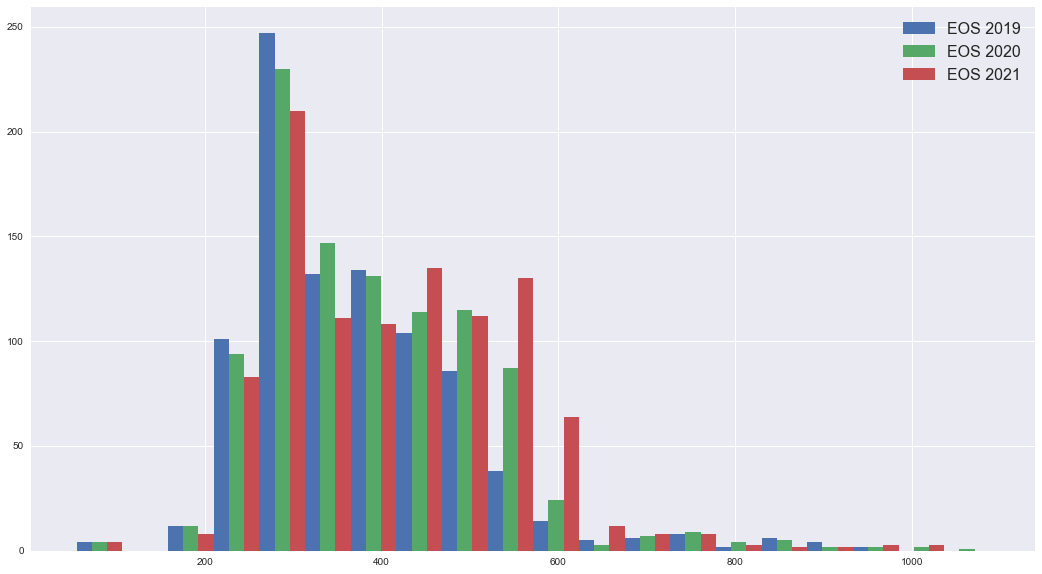

In [67]:
# Plot the data for the three year's round 1 points for comparison in side by side bar chart.
plt.hist(x, label = ('EOS 2019', 'EOS 2020', 'EOS 2021'), rwidth=1)
plt.legend(loc='upper right', fontsize=16)
plt.show()

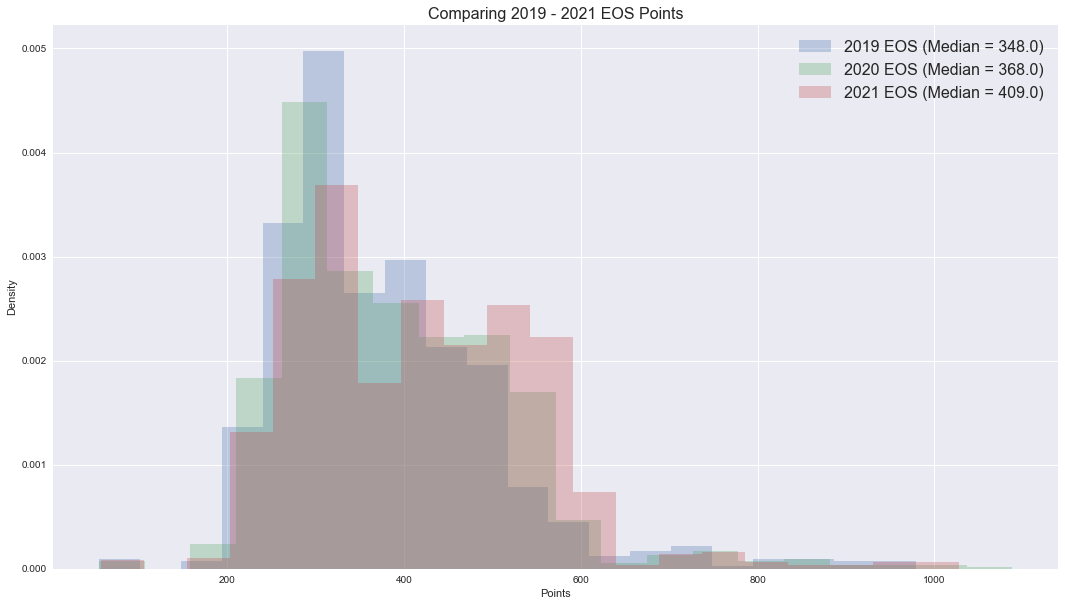

In [68]:
# Create overlapping histogram plot using the data for each year's EOS points.
plt.hist(EOS_2019, label = f'2019 EOS (Median = {med_2019})',
         alpha = 0.3, density=True)
plt.hist(EOS_2020, label = f'2020 EOS (Median = {med_2020})',
         alpha = 0.3, density=True)
plt.hist(EOS_2021, label = f'2021 EOS (Median = {med_2021})',
         alpha = 0.3, density=True)
# Add plot labels and legend.
plt.title('Comparing 2019 - 2021 EOS Points', fontsize=16)
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend(loc='upper right', fontsize=16)
plt.show()

In [69]:
# Create a numpy array for each year's Mid points.
Mid_2019 = df_merge['Mid_2019'].to_numpy()
Mid_2020 = df_merge['Mid_2020'].to_numpy()
Mid_2021 = df_merge['Mid_2021'].to_numpy()

# Calculate the median value for each year's Mid points.
med_2019 = df_merge['Mid_2019'].median()
med_2020 = df_merge['Mid_2020'].median()
med_2021 = df_merge['Mid_2021'].median()

In [70]:
# Stack all numpy arrays and transpose
x = np.vstack([Mid_2019, Mid_2020, Mid_2021]).T

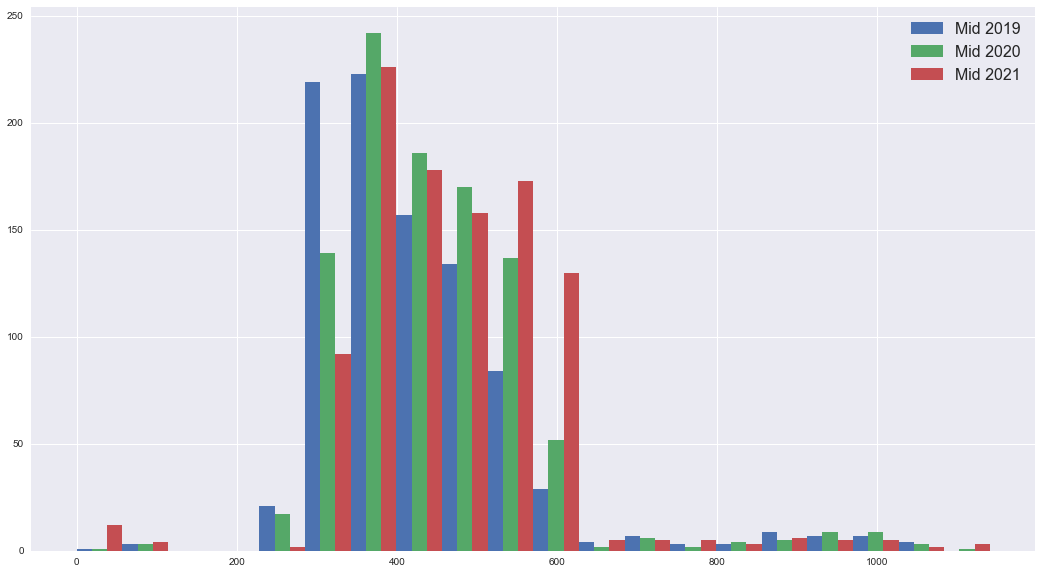

In [71]:
# Plot the data for the three year's Mid points for comparison in side by side bar chart.
plt.hist(x, label = ('Mid 2019', 'Mid 2020', 'Mid 2021'), rwidth=1)
plt.legend(loc='upper right', fontsize=16)
plt.show()

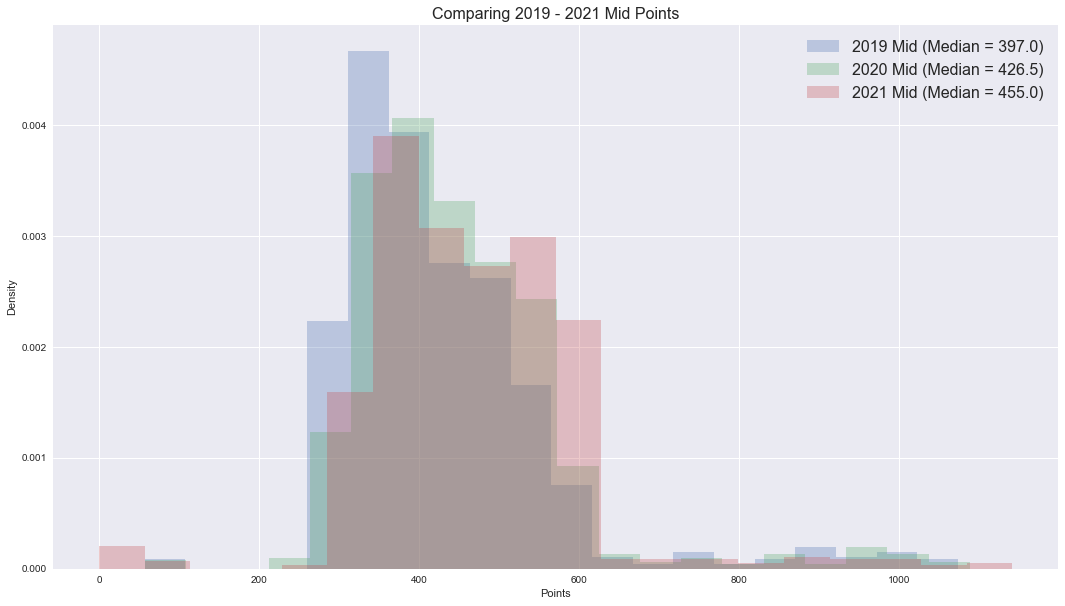

In [72]:
# Create overlapping histogram plot using the data for each year's Mid points.
plt.hist(Mid_2019, label = f'2019 Mid (Median = {med_2019})',
         alpha = 0.3, density=True)
plt.hist(Mid_2020, label = f'2020 Mid (Median = {med_2020})',
         alpha = 0.3, density=True)
plt.hist(Mid_2021, label = f'2021 Mid (Median = {med_2021})',
         alpha = 0.3, density=True)
# Add plot labels and legend.
plt.title('Comparing 2019 - 2021 Mid Points', fontsize=16)
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend(loc='upper right', fontsize=16)
plt.show()

In [73]:
# Create an array for each year's round 1 points (2019 does not have round 1 points)
# r2_2019 = df_merge['Points1_2019'].to_numpy()
r1_2020 = df_merge['Points1_2020'].to_numpy()
r1_2021 = df_merge['Points1_2021'].to_numpy()

# Calculate the median value for each year's round 1 points (2019 does not have round 1 points).
#med2_2019 = df_merge['Points1_2019'].median()
med1_2020 = df_merge['Points1_2020'].median()
med1_2021 = df_merge['Points1_2021'].median()

In [74]:
# Stack all numpy arrays and transpose
y = np.vstack([r1_2020, r1_2021]).T

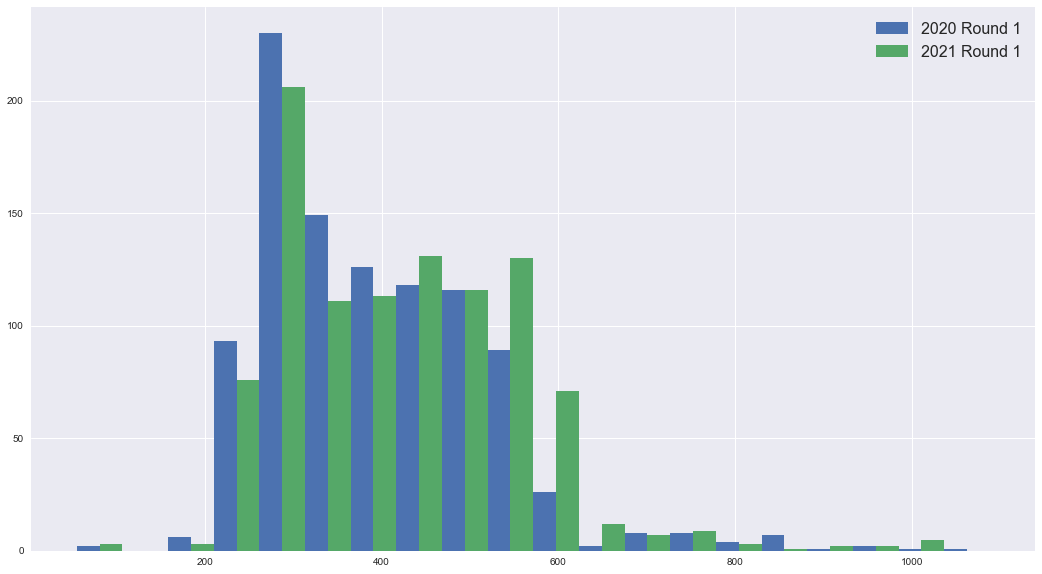

In [75]:
# Plot the data for the three year's round 2 points for comparison.
plt.hist(y, label = ('2020 Round 1', '2021 Round 1'), rwidth=1)
plt.legend(loc='upper right', fontsize=16)
plt.show()

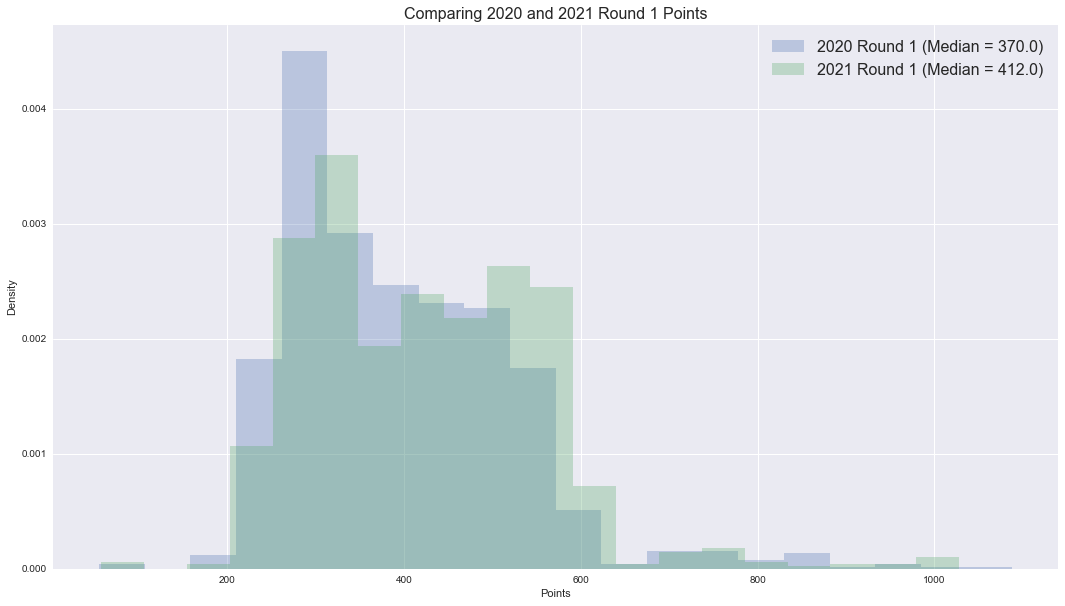

In [76]:
# Create the over lapping hist plot using the data for each year's round 1 points.

plt.hist(r1_2020, label = f'2020 Round 1 (Median = {med1_2020})',
         alpha = 0.3, density=True)
plt.hist(r1_2021, label = f'2021 Round 1 (Median = {med1_2021})',
         alpha = 0.3, density=True)
# Add plot labels and legend.
plt.title('Comparing 2020 and 2021 Round 1 Points', fontsize=16)
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend(loc='upper right', fontsize=16)
plt.show()

In [77]:
# Create an array for each year's round 2 points (2019 does not have round 2 points)
# r2_2019 = df_merge['Points1_2019'].to_numpy()
r2_2020 = df_merge['Points2_2020'].to_numpy()
r2_2021 = df_merge['Points2_2021'].to_numpy()

# Calculate the median value for each year's round 2 points (2019 does not have round 2 points).
#med2_2019 = df_merge['Points1_2019'].median()
med2_2020 = df_merge['Points2_2020'].median()
med2_2021 = df_merge['Points2_2021'].median()

In [78]:
# Stack all numpy arrays and transpose
y = np.vstack([r2_2020, r2_2021]).T

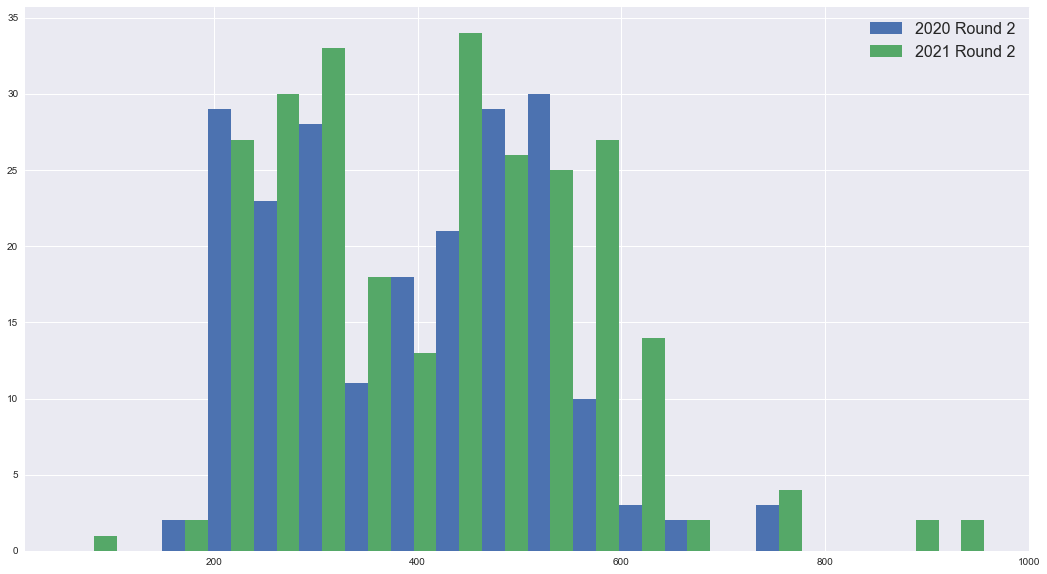

In [79]:
# Plot the data for the three year's round 2 points for comparison.
plt.hist(y, label = ('2020 Round 2', '2021 Round 2'), rwidth=1)
plt.legend(loc='upper right', fontsize=16)
plt.show()

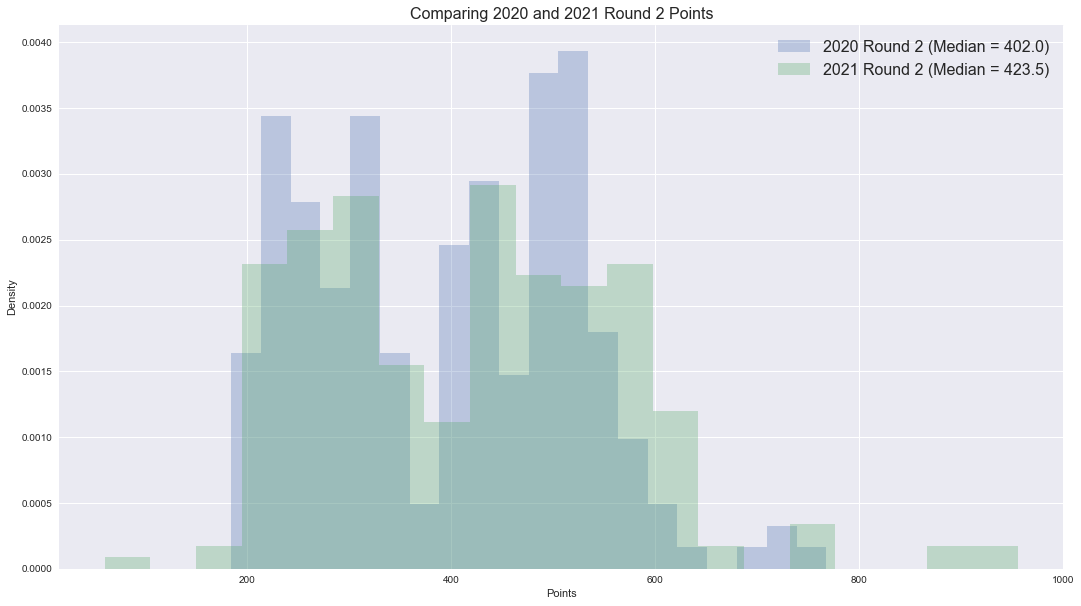

In [80]:
# Create the over lapping hist plot using the data for each year's round 2 points.

plt.hist(r2_2020, label = f'2020 Round 2 (Median = {med2_2020})',
         alpha = 0.3, density=True)
plt.hist(r2_2021, label = f'2021 Round 2 (Median = {med2_2021})',
         alpha = 0.3, density=True)
# Add plot labels and legend.
plt.title('Comparing 2020 and 2021 Round 2 Points', fontsize=16)
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend(loc='upper right', fontsize=16)
plt.show()

<br>

### Histogram Summary.

It is clear that the matplotlib.pyplot histogram is not the greatest tool for visualising the distribution differences across our four metrics (EOS, Mid, Round 1 points and Round 2 Points). While we can see that the distributions do not seem to approximate a normal distribution and there seems to be some differences in the mean and median values, the visualizations seem cluttered and messy.

<br>

## Kernel Density Plots (KDE)

***

In [81]:
# Advanced plotting
import seaborn as sns
# Statistical package.
from scipy import stats
# Probability Scales for Matplotlib.
import probscale

***

### Compare EOS Points Distributions 2019-2021.

***

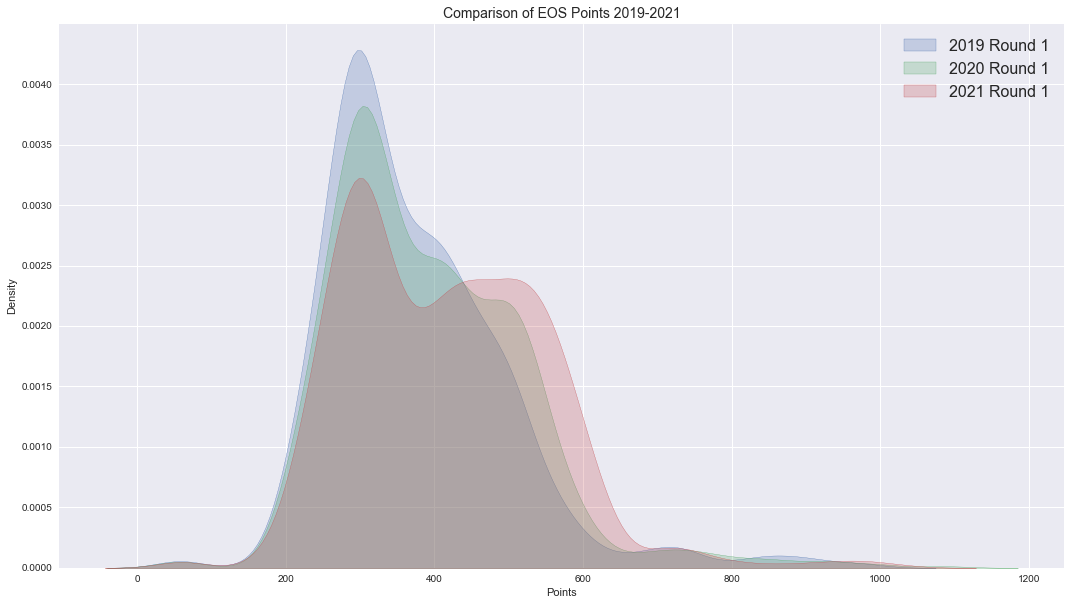

In [82]:
# Define Fig and ax.
fig, ax = plt.subplots()
# Set title and y-axis label.
ax.set_title('Comparison of EOS Points 2019-2021', size=14)
ax.set_xlabel('Points')
# Plot EOS points 2019-2021 using KDE plot.
ax = sns.kdeplot(data=EOS_2019, fill = True, label = '2019 Round 1')
ax = sns.kdeplot(data=EOS_2020, fill = True, label = '2020 Round 1')
ax = sns.kdeplot(data=EOS_2021, fill = True, label = '2021 Round 1')
# Define where legend is displayed.
ax.legend(loc='upper right', fontsize=16)
plt.show()

***

### Compare Mid Points Distributions 2019-2021.

***

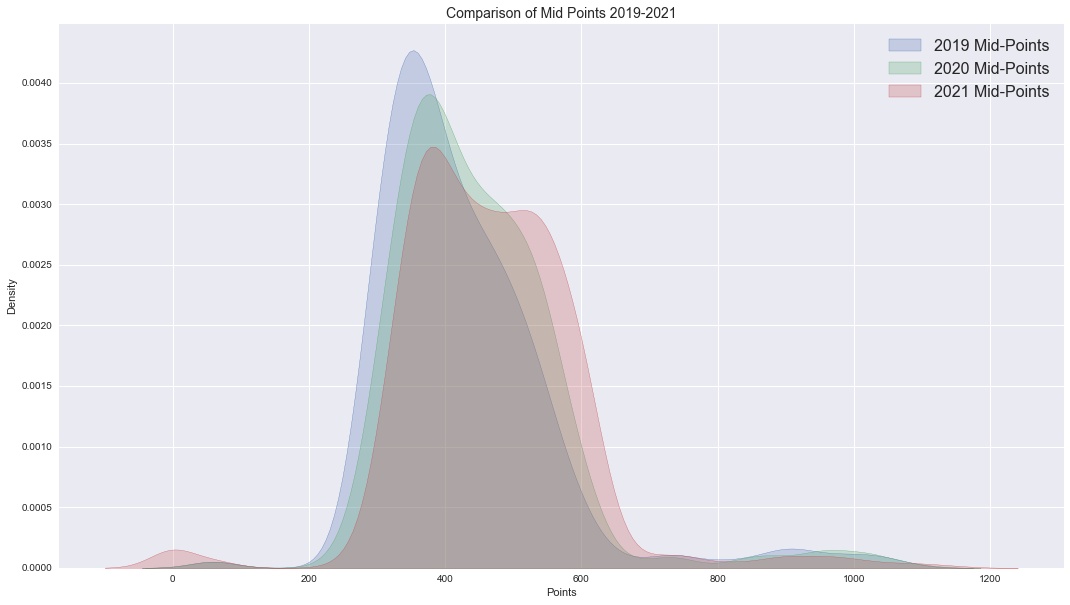

In [83]:
# Define Fig and ax.
fig, ax = plt.subplots()
# Set title and y-axis label.
ax.set_title('Comparison of Mid Points 2019-2021', size=14)
ax.set_xlabel('Points')
# Plot Mid points 2019-2021 using KDE plot.
ax = sns.kdeplot(data=Mid_2019, fill = True, label = '2019 Mid-Points')
ax = sns.kdeplot(data=Mid_2020, fill = True, label = '2020 Mid-Points')
ax = sns.kdeplot(data=Mid_2021, fill = True, label = '2021 Mid-Points')
# Define where legend is displayed.
ax.legend(loc='upper right', fontsize=16)
plt.show()

***

### Compare Round 1 Points Distributions 2020-2021.

***

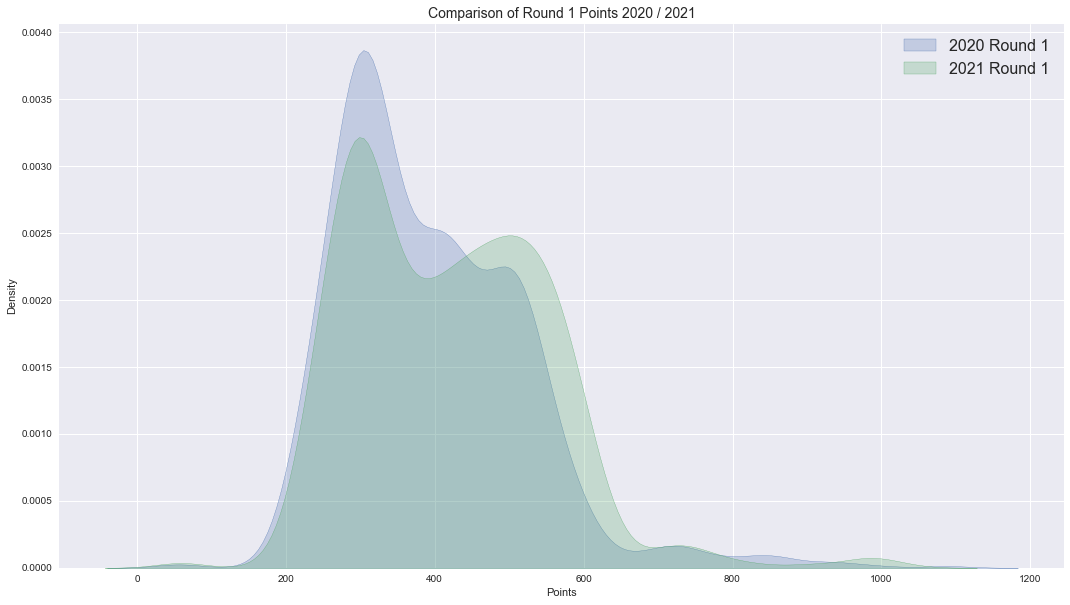

In [84]:
# Define Fig and ax.
fig, ax = plt.subplots()
# Set title and y-axis label.
ax.set_title('Comparison of Round 1 Points 2020 / 2021', size=14)
ax.set_xlabel('Points')
# Plot Round 1 points 2020-2021 using KDE plot.
ax = sns.kdeplot(data=r1_2020, fill = True, label = '2020 Round 1')
ax = sns.kdeplot(data=r1_2021, fill = True, label = '2021 Round 1')
# Define where legend is displayed.
ax.legend(loc='upper right', fontsize=16)
plt.show()

***

### Compare Round 2 Points Distributions 2020-2021.

***

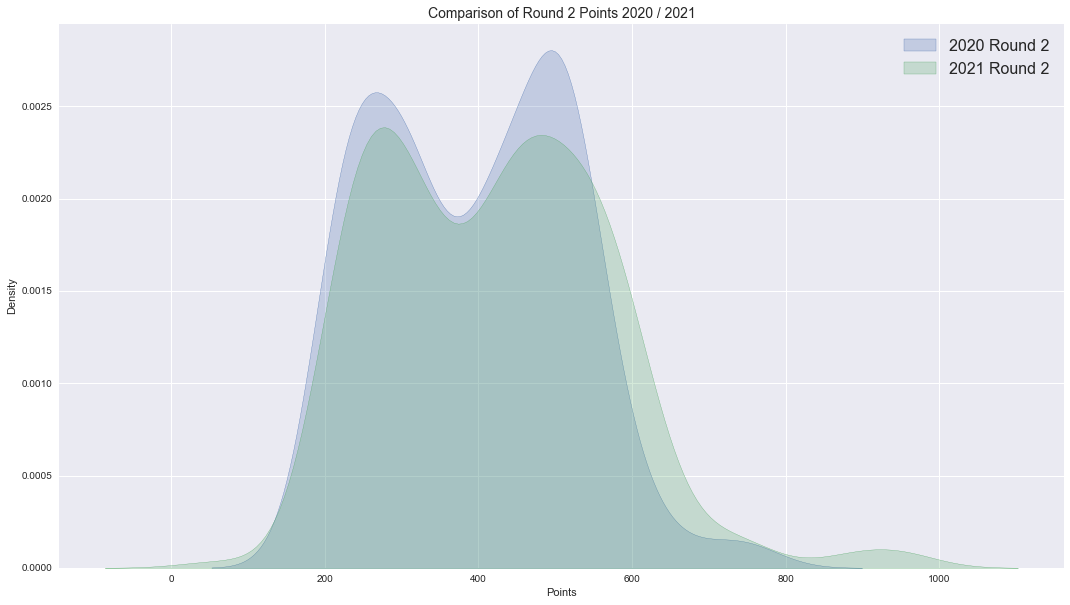

In [85]:
# Define Fig and ax.
fig, ax = plt.subplots()
# Set title and y-axis label.
ax.set_title('Comparison of Round 2 Points 2020 / 2021', size=14)
ax.set_xlabel('Points')
# Plot Round 1 points 2020-2021 using KDE plot.
ax = sns.kdeplot(data=r2_2020, fill = True, label = '2020 Round 2')
ax = sns.kdeplot(data=r2_2021, fill = True, label = '2021 Round 2')
# Define where legend is displayed.
ax.legend(loc='upper right', fontsize=16)

plt.show()

<br>

For me, the Seaborn KDE plot is a more effective and visually pleasing method of comparing the distributions than the matplotlib.pyplot.hist plot. It is fairly clear that the distributions we are dealing with in each of the variables we are analysing do not approximate the normal distribution. I would sat that the EOS points, the Mid Points and the Round 1 points all exhibit right-skew in their distributions while the round 2 points have a clear bimodal distribution. In the next section we will use the Pandas skew and kurtosis functions to evaluate each distribution.

<br>

### Evaluating skewness and Kurtosis

When we have a data set which approximates the normal distribution the mean, median and mode of the data will all be relatively close to each other. This is what generates the classic "bell-curve". When we see the mean, median and mode become increasingly unequal we can infer that we might have skewness in our data:

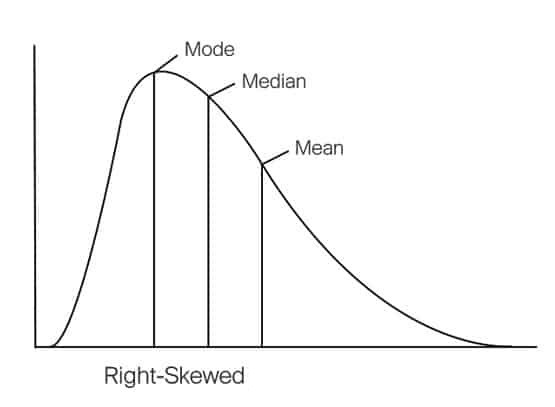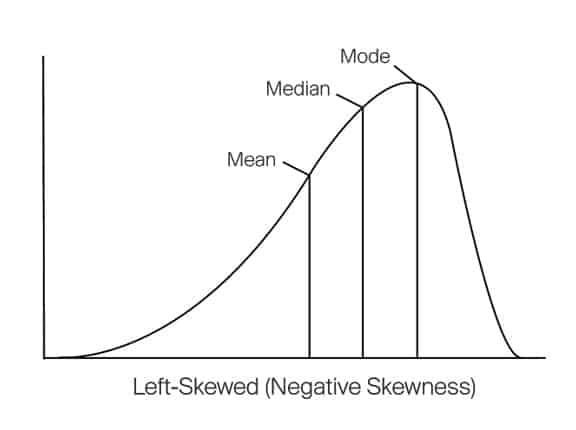
[reference](https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37)


Kurtosis on the other hand measures the tailedness of the data. There are three types of kurtosis:

- Mesokurtic kurtosisis when the tailedness of the distribution is similar to the normal distribution.
- Leptokurtic kurtosis results when a distribution has a lot of data in the tails.
- Platykurtic kurtosis results when there is very little data in the tails of the distribution.

[Reference](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/kurtosis-leptokurtic-platykurtic/)

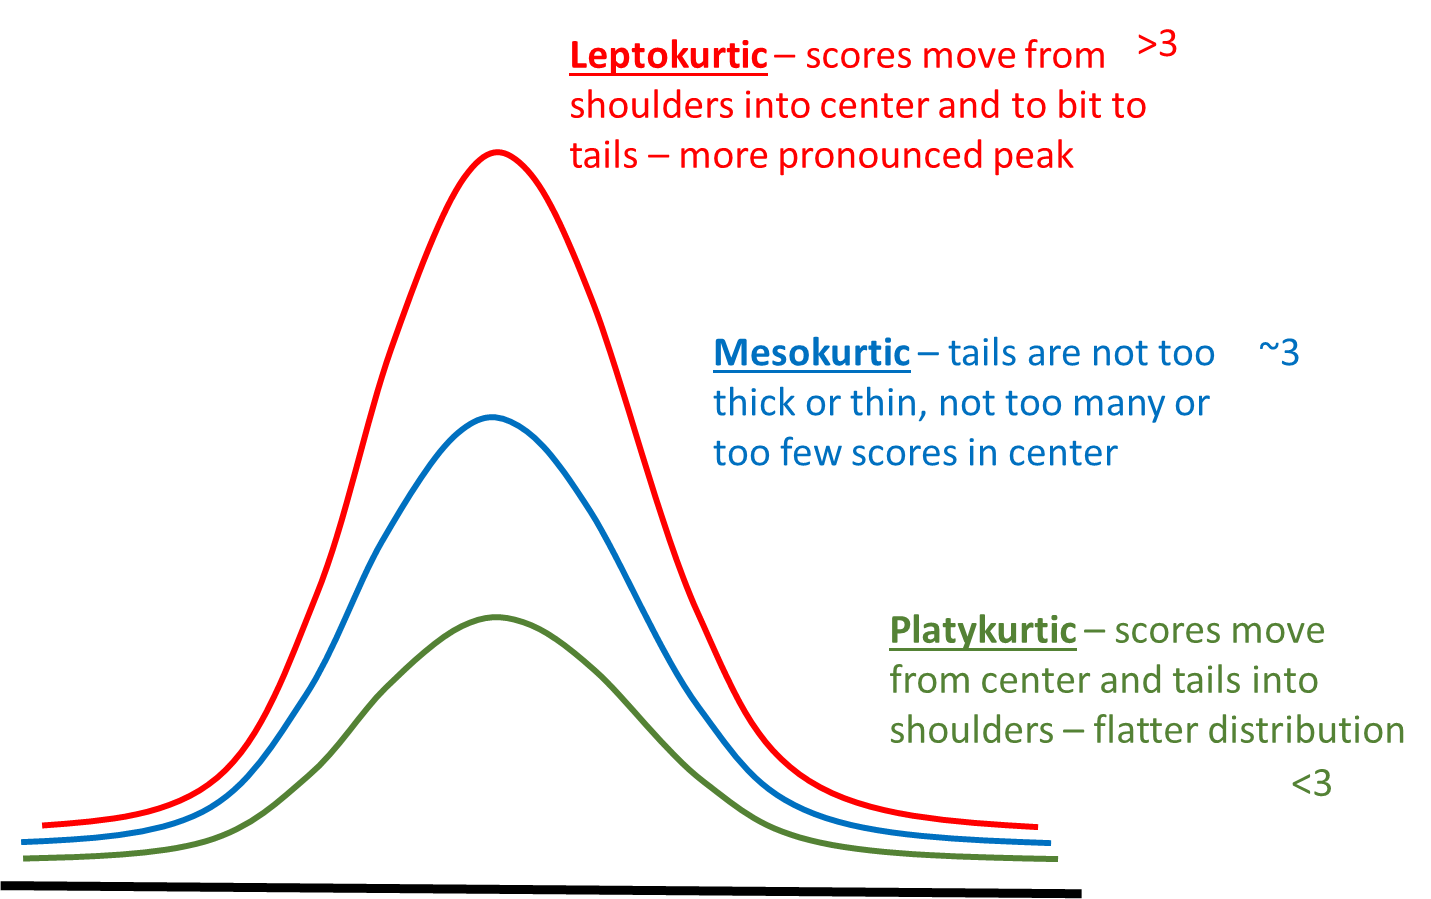

https://bookdown.org/curleyjp0/psy317l_guides5/distributions.html



***

When we review the skew values for each of the year's EOS points we have two distinct categories of skew. In 2019 and 2020 both the round one points and round 2 points exhibit high values for skew indicating that they are right skewed. In 2021, the EOS points exhibit less skew than the previous years however, rather than saying this was due to the data approximating the normal distribution I would be more inclined to think this is due to the bimodal characteristics that the data set exhibits.

The Mid-points exhibit the same distinct grouping - 2019 and 2020 show a high level of skew while, 2021 has a lower level of skew, again, more than likely due to the bimodal distribution.

We only have data for Round 1 and Round 2 points for 2020 and 2021. The skew is higher for round 1 points in both years but lower for round 2 points. Once again, the bimodal characteristics of the round 2 distributions is most likely why the skew is lower.

If we were dealing with normal distributions we would expect the skew value to be around 0.0

***

In [86]:
print('The skewness of each column is as follows: ')
print(df_merge.skew(axis=0, numeric_only=True))

The skewness of each column is as follows: 
Points1_2019         NaN
Points2_2019         NaN
EOS_2019        1.459909
Mid_2019        2.022493
Points1_2020    1.201913
Points2_2020    0.229839
EOS_2020        1.223431
Mid_2020        1.845680
Points1_2021    0.816076
Points2_2021    0.578913
EOS_2021        0.753121
Mid_2021        0.717101
dtype: float64


***

When we review the kurtosis values for each of the year's EOS points we have two distinct categories of kurtosis. In 2019 and 2020 both the round one points and round 2 points exhibit high values for kurtosis indicating that they are Leptokurtic (A lot of data in the tails). In 2021, the EOS points exhibit less kurtosis than the previous years however, rather than saying this was due to the data approximating the normal distribution I would be more inclined to think this is due to the bimodal characteristics that the data set exhibits.

The Mid-points exhibit high levels of kurtosis for all three years.

We only have data for Round 1 and Round 2 points for 2020 and 2021. The kurtosis is higher for round 1 points in both years but lower for round 2 points. Once again, the bimodal characteristics of the round 2 distributions is most likely why the kurtosis is lower.

***

In [87]:
print('The kurtosis of each column is as follows: ')
print(df_merge.kurtosis(axis=0, numeric_only=True))

The kurtosis of each column is as follows: 
Points1_2019         NaN
Points2_2019         NaN
EOS_2019        3.723962
Mid_2019        6.228088
Points1_2020    2.748078
Points2_2020   -0.710959
EOS_2020        3.043115
Mid_2020        6.085258
Points1_2021    1.596234
Points2_2021    0.571934
EOS_2021        1.362149
Mid_2021        4.978038
dtype: float64


<br>

***

### Evaluating Quantile-Quantile Plots for Our Data

From our previous analysis we can be fairly certain that none of the distributions are representative of the normal distribution. There is one final plot we can use to visually demonstrate the lack of normalcy.

A Quantitle- Quantile (QQ) plot can be used to help us to identify various distributions. For our purpose we will be using the QQ plots to determine if the data for each year's mid points, EOS points, round 1 and round 2 points are representative of the normal distribution.

When data are normally distributed and a QQ plot is created, the data will appear as a straight, line (approximately). When the data is right skewed, the QQ plot will show a concave line, while left skewed data will be convex when plotted on the QQ plot.

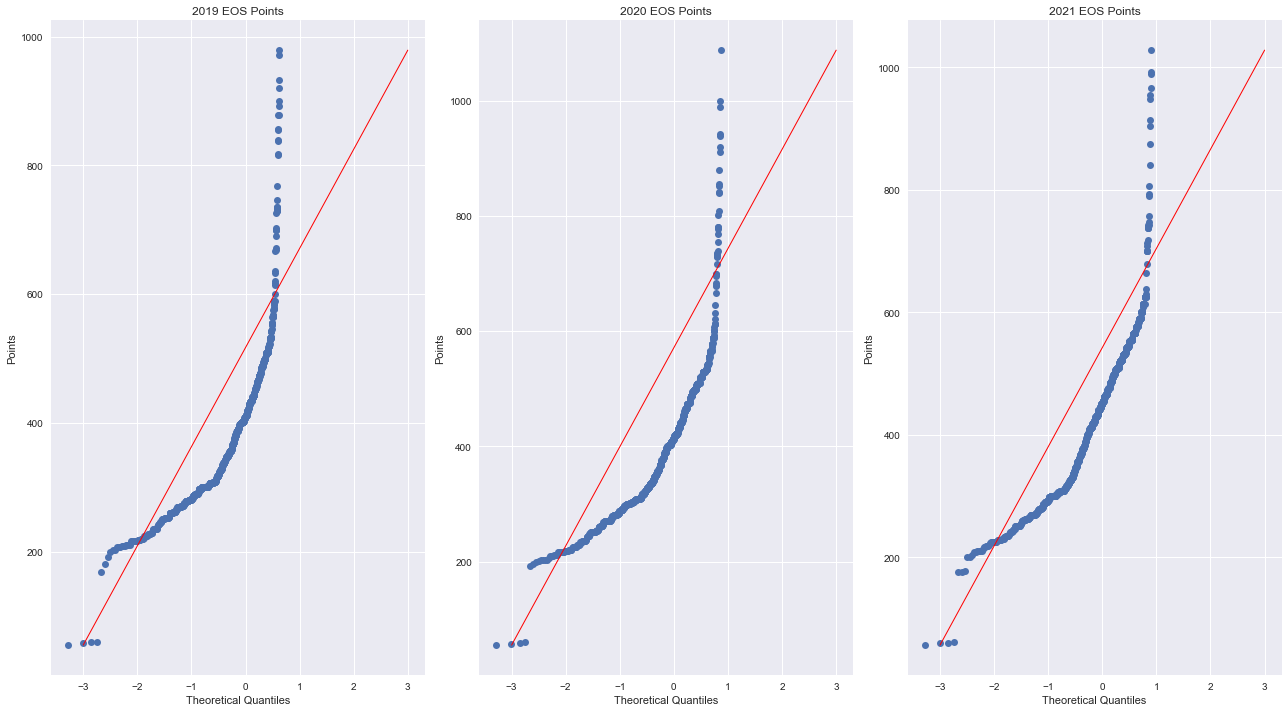

In [88]:
# Define fig and 3 axes.
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True)

# Set title for ax1
ax1.title.set_text('2019 EOS Points')

# Create QQ plot for 2019 EOS points on ax1.
probscale.probplot(EOS_2019, ax=ax1, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line.
ax1.plot([-3, 3], [55, 979], 'red', linewidth=1)
# Set title for ax2
ax2.title.set_text('2020 EOS Points')
# Create QQ plot for 2020 EOS points on ax2.
probscale.probplot(EOS_2020, ax=ax2, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line.
ax2.plot([-3, 3], [55, 1088], 'red', linewidth=1)
# Set title for ax3
ax3.title.set_text('2021 EOS Points')
# Create QQ plot for 2021 EOS points on ax3.
probscale.probplot(EOS_2021, ax=ax3, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line.
ax3.plot([-3, 3], [57, 1028], 'red', linewidth=1)


fig.tight_layout()
sns.despine()
plt.show()

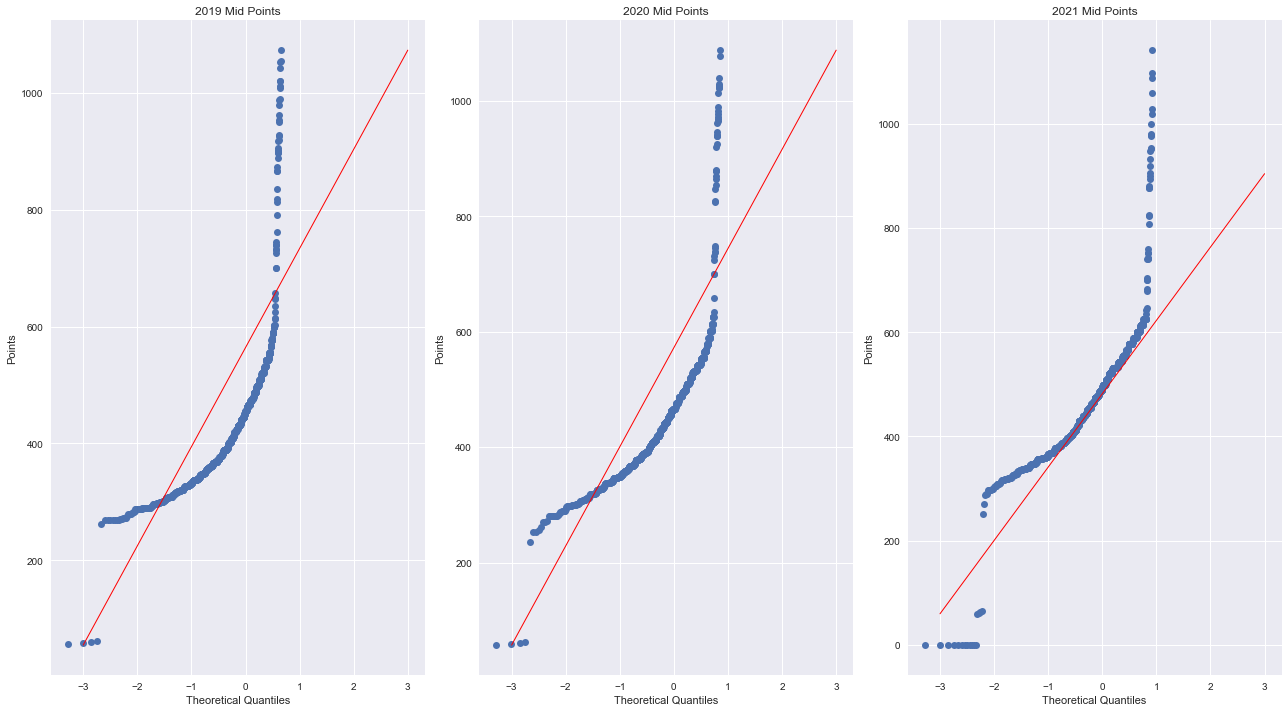

In [89]:
# Define fig and 3 axes.
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True)

# Set title for ax1
ax1.title.set_text('2019 Mid Points')

# Create QQ plot for 2019 Mid points on ax1.
probscale.probplot(Mid_2019, ax=ax1, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line in red.
ax1.plot([-3, 3], [55, 1073], 'red', linewidth=1)

# Set title for ax2
ax2.title.set_text('2020 Mid Points')
# Create QQ plot for 2020 Mid points on ax2.
probscale.probplot(Mid_2020, ax=ax2, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line in red.
ax2.plot([-3, 3], [57, 1088], 'red', linewidth=1)

# Set title for ax2
ax3.title.set_text('2021 Mid Points')
# Create QQ plot for 2021 Mid points on ax3.
probscale.probplot(Mid_2021, ax=ax3, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line in red.
ax3.plot([-3, 3], [60, 904], 'red', linewidth=1)


fig.tight_layout()
sns.despine()
plt.show()

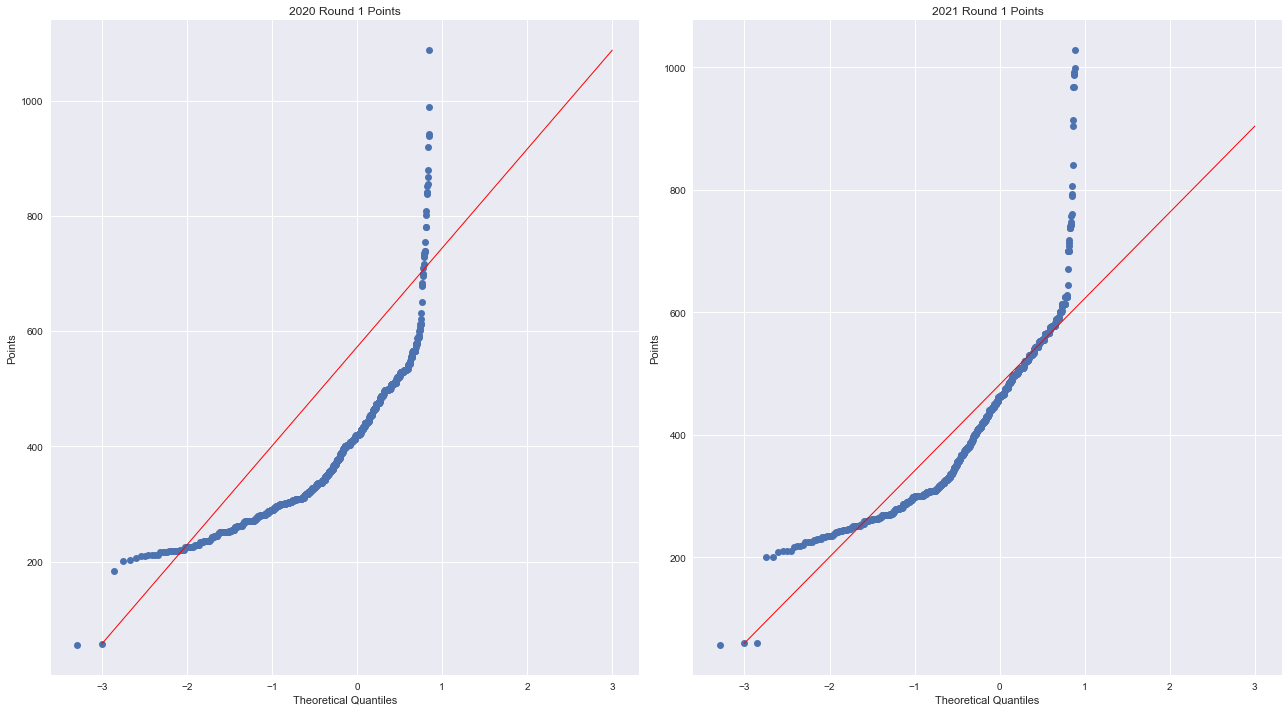

In [90]:
# Define fig and 2 axes.
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)

# Set title for ax1
ax1.title.set_text('2020 Round 1 Points')
# Create QQ plot for 2020 Round 1 points on ax1.
probscale.probplot(r1_2020, ax=ax1, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line in red.
ax1.plot([-3, 3], [57, 1088], 'red', linewidth=1)

# Set title for ax2
ax2.title.set_text('2021 Round 1 Points')
# Create QQ plot for 2021 Round 1 points on ax2.
probscale.probplot(r1_2021, ax=ax2, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line in red.
ax2.plot([-3, 3], [60, 904], 'red', linewidth=1)


fig.tight_layout()
sns.despine()
plt.show()

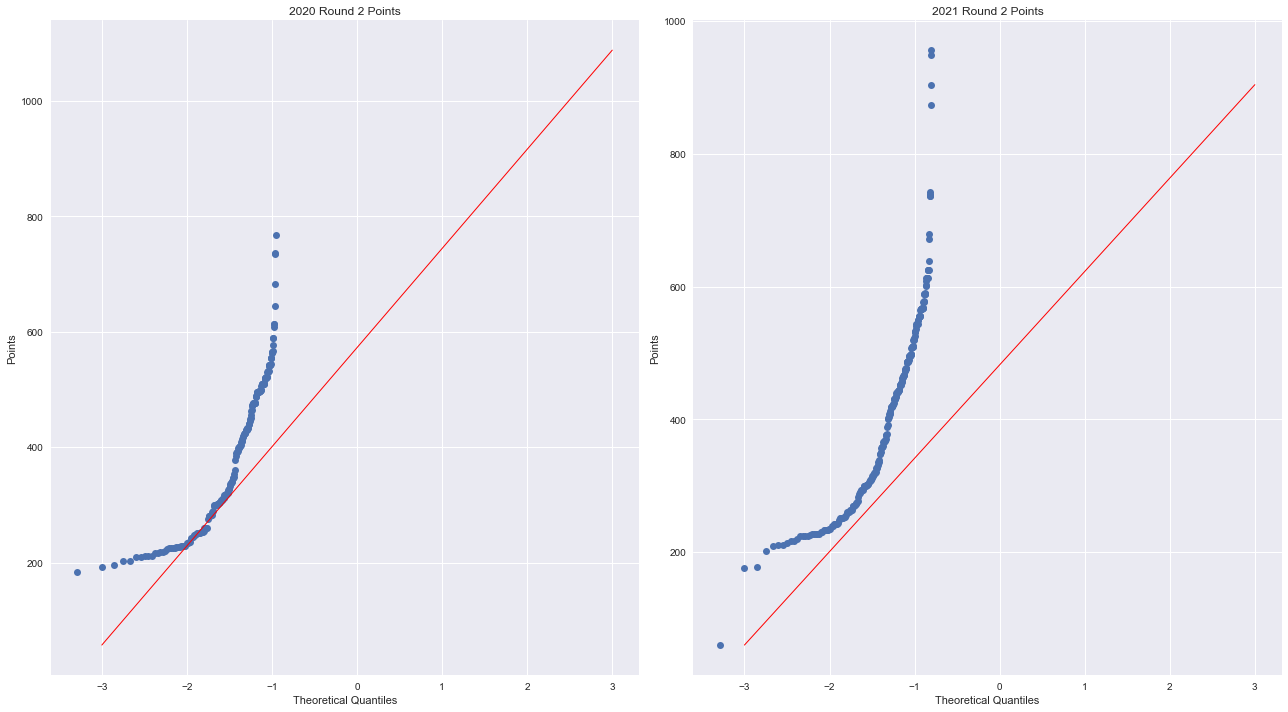

In [91]:
# Define fig and 2 axes.
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)

# Set title for ax1
ax1.title.set_text('2020 Round 2 Points')
# Create QQ plot for 2020 Round 2 points on ax1.
probscale.probplot(r2_2020, ax=ax1, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line in red.
ax1.plot([-3, 3], [57, 1088], 'red', linewidth=1)

# Set title for ax2
ax2.title.set_text('2021 Round 2 Points')
# Create QQ plot for 2021 Round 2 points on ax2.
probscale.probplot(r2_2021, ax=ax2, plottype='qq',
                   problabel='Theoretical Quantiles',
                   datalabel='Points')
# Add normal line in red.
ax2.plot([-3, 3], [60, 904], 'red', linewidth=1)


fig.tight_layout()
sns.despine()
plt.show()

It is very clear from the quantile-quantile plots that we do not have any data that approximates the normal distribution. Although we have shown this previously with the Skew and Kurtosis vales, I feel that the Q-Q plot allows us to see this visually.

Why was this important analysis to carry out?

Now that we know that the distributions are not normal we need to re-evaluate how we carry out our statistical analysis on the datasets. The go to parametric test for comparing two or more data sets is the ANOVA (Analysis of Variance) however, one important assumption of the ANOVA test is that the data should be normally (or close to normally) distributed. While the ANOVA test is not overly sensitive to small deviations from normality there is a possibility that we may increase our chances of a false positive test.

Since our datasets are not all symmetrical nor uni-modal it would be a mistake to use ANOVA for our analysis.

https://www.real-statistics.com/one-way-analysis-of-variance-anova/assumptions-anova/



In [92]:
# Reminder of the df_merge dataframe.
df_merge.head()

,Code,Title,Points1_2019,Points2_2019,EOS_2019,Mid_2019,Points1_2020,Points2_2020,EOS_2020,Mid_2020,Points1_2021,Points2_2021,EOS_2021,Mid_2021
0,AC120,International Business,NaN,NaN,234.0,269.0,209.0,NaN,209.0,280.0,294.0,294.0,294.0,352.0
1,AC137,Liberal Arts,NaN,NaN,252.0,275.0,252.0,NaN,252.0,270.0,271.0,270.0,270.0,334.0
2,AD101,First Year Art & Design (Common Entry),NaN,NaN,NaN,550.0,NaN,NaN,NaN,NaN,554.0,NaN,554.0,604.0
3,AD102,Graphic Design and Moving Image Design,NaN,NaN,NaN,635.0,NaN,NaN,NaN,NaN,538.0,NaN,538.0,625.0
4,AD103,Textile & Surface Design and Jewellery & Objects,NaN,NaN,NaN,545.0,NaN,NaN,NaN,NaN,505.0,NaN,505.0,581.0


In [93]:
# https://towardsdatascience.com/wide-to-long-data-how-and-when-to-use-pandas-melt-stack-and-wide-to-long-7c1e0f462a98
# Convert the dataframe from wide format to long format.
df1 = df_merge.melt(id_vars=['Code', 'Title'], var_name='Points_Year', value_name='Points')


In [94]:
# Take a peak.
df1.head()

,Code,Title,Points_Year,Points
0,AC120,International Business,Points1_2019,NaN
1,AC137,Liberal Arts,Points1_2019,NaN
2,AD101,First Year Art & Design (Common Entry),Points1_2019,NaN
3,AD102,Graphic Design and Moving Image Design,Points1_2019,NaN
4,AD103,Textile & Surface Design and Jewellery & Objects,Points1_2019,NaN


<br>

## Boxplots for Quantitative Comparison.

While the KDE plot was a good method to compare the distributions for each of our 4 variables (EOS, Mid, Round 1 and Round 2) there is amore effective plot we can use to get a more quantitive comparison.

The boxplot is an excellent tool to get a 5 number summary of any dataset:

- Minimum
- Q1 (25th percentile)
- Median
- Q3 (75th percentile)
- Maximum

From these values we can make more quantitive analysis for each of the variables over the years.

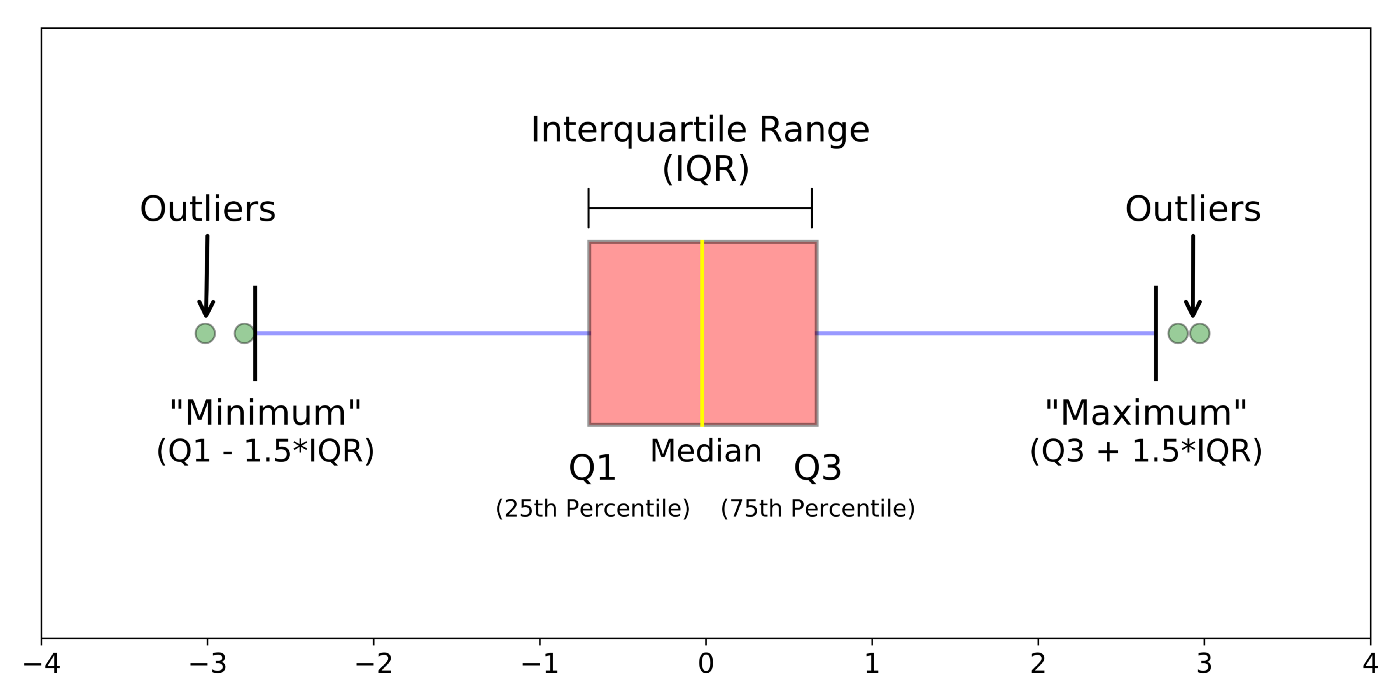

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [95]:
# Create a new dataframe only with round 1 points included.
points1 = df1[df1['Points_Year'].isin(['Points1_2020', 'Points1_2021'])]

# Create a new dataframe only with round 2 points included.
points2 = df1[df1['Points_Year'].isin(['Points2_2020', 'Points2_2021'])]

# Create a new dataframe only with EOS points included.
EOS = df1[df1['Points_Year'].isin(['EOS_2019', 'EOS_2020', 'EOS_2021'])]

# Create a new dataframe only with Mid points included.
mid = df1[df1['Points_Year'].isin(['Mid_2019', 'Mid_2020', 'Mid_2021'])]


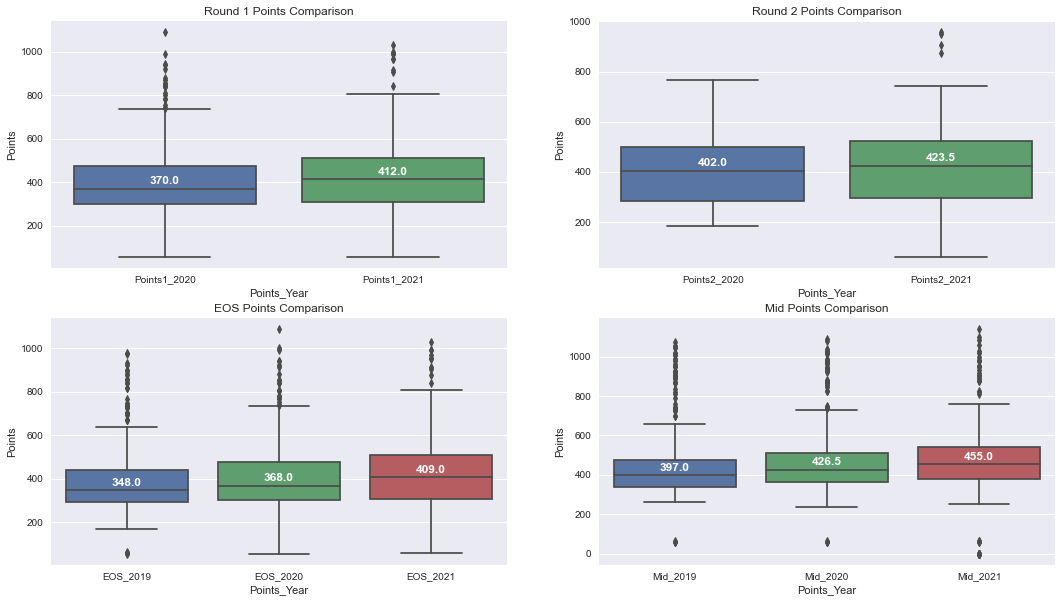

In [96]:
# https://stackoverflow.com/questions/45475962/labeling-boxplot-with-median-values
# Define fig and axes and a 2 x 2 matrix for subplots.
fig, axes = plt.subplots(2, 2)

# Create first box plot in matrix 0,0 with round 1 points comparison.
ax1 = sns.boxplot(x =points1['Points_Year'], y=points1['Points'], ax=axes[0,0])
# Set sub plot title.
ax1.set_title('Round 1 Points Comparison')
# Calculate the median values for each year.
medians = points1.groupby(['Points_Year'])['Points'].median()
# Define the vertical offset from the median line.
vertical_offset = points1['Points'].median() * 0.05 # offset from median for display

# Loop through the number of boxplot categories defined in the x-ticks.
for xtick in ax1.get_xticks():
    # Define text to add to each boxplot.
    ax1.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='large',color='w',weight='bold')
    
# Create second box plot in matrix 0,1 with round 2 points comparison.
ax2 = sns.boxplot(x =points2['Points_Year'], y=points2['Points'], ax=axes[0,1])
# Set sub plot title.
ax2.set_title('Round 2 Points Comparison')
# Calculate the median values for each year.
medians = points2.groupby(['Points_Year'])['Points'].median()
# Define the vertical offset from the median line.
vertical_offset = points2['Points'].median() * 0.05 # offset from median for display

# Loop through the number of boxplot categories defined in the x-ticks.
for xtick in ax2.get_xticks():
    # Define text to add to each boxplot.
    ax2.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='large',color='w',weight='bold')
    


# Create third box plot in matrix 1,0 with round EOS points comparison.    
ax3 = sns.boxplot(x =EOS['Points_Year'], y=EOS['Points'], ax=axes[1,0])
# Set sub plot title.
ax3.set_title('EOS Points Comparison')
# Calculate the median values for each year.
medians = EOS.groupby(['Points_Year'])['Points'].median()
# Define the vertical offset from the median line.
vertical_offset = EOS['Points'].median() * 0.05 # offset from median for display

# Loop through the number of boxplot categories defined in the x-ticks.
for xtick in ax3.get_xticks():
    # Define text to add to each boxplot.
    ax3.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='large',color='w',weight='bold')
    
    
# Create fourth box plot in matrix 1,1 with round Mid points comparison.
ax4 = sns.boxplot(x =mid['Points_Year'], y=mid['Points'], ax=axes[1,1])
# Set sub plot title.
ax4.set_title('Mid Points Comparison')
# Calculate the median values for each year.
medians = mid.groupby(['Points_Year'])['Points'].median()
# Define the vertical offset from the median line.
vertical_offset = mid['Points'].median() * 0.05 # offset from median for display

# Loop through the number of boxplot categories defined in the x-ticks.
for xtick in ax4.get_xticks():
    # Define text to add to each boxplot.
    ax4.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='large',color='w',weight='bold')

In [97]:
# Create Summary Table.
df1.groupby(['Points_Year']).describe()


Points                                                        \
               count        mean         std    min     25%    50%     75%   
Points_Year                                                                  
EOS_2019       905.0  374.893923  123.959108   55.0  290.00  348.0  440.00   
EOS_2020       993.0  391.799597  128.446837   55.0  300.00  368.0  474.00   
EOS_2021      1006.0  414.464215  133.636427   57.0  304.25  409.0  509.75   
Mid_2019       915.0  426.414208  133.142255   57.0  339.00  397.0  477.50   
Mid_2020       988.0  448.198381  129.237735   57.0  362.00  426.5  510.00   
Mid_2021      1014.0  465.928994  132.284315    0.0  379.00  455.0  541.00   
Points1_2019     0.0         NaN         NaN    NaN     NaN    NaN     NaN   
Points1_2020   989.0  394.300303  126.135161   55.0  301.00  370.0  476.00   
Points1_2021  1001.0  419.503497  133.020593   57.0  307.00  412.0  511.00   
Points2_2019     0.0         NaN         NaN    NaN     NaN    NaN     NaN   
Points2_2020   209.0  394.521531  127.579578  184.0  282.00  402.0  498.00   
Points2_2021   260.0  417.980769  148.367889   60.0  294.00  423.5  523.00   

                      
                 max  
Points_Year           
EOS_2019       979.0  
EOS_2020      1088.0  
EOS_2021      1028.0  
Mid_2019      1073.0  
Mid_2020      1088.0  
Mid_2021      1141.0  
Points1_2019     NaN  
Points1_2020  1088.0  
Points1_2021  1028.0  
Points2_2019     NaN  
Points2_2020   768.0  
Points2_2021   956.0

Let us summarise what the boxplots and associated table tell us about the various variables when we compare 2019, 2020 and 2021. Remember we are going to quote the median values rather than the mean values due to the skewness of our datasets.

### EOS Points.

- Median increased by 5.74% from 2019 to 2020.
- Median increased by 6.8% from 2020 to 2021.
- 25th percentile increased by 3.44% from 2019 to 2020
- 25th percentile increased by 1.4% from 2020 to 2021
- 75th percentile increased by 7.7% from 2019 to 2020
- 75th percentile increased by 7.5% from 2020 to 2021

Overall the End of Season points have been increasing year on year from 2019 to 2021.

### Mid Points.

- Median increased by 7.3% from 2019 to 2020.
- Median increased by 11% from 2020 to 2021.
- 25th percentile increased by 6.8% from 2019 to 2020
- 25th percentile increased by 4.7% from 2020 to 2021
- 75th percentile increased by 6.9% from 2019 to 2020
- 75th percentile increased by 6.1% from 2020 to 2021

Overall the Mid points have been increasing year on year from 2019 to 2021.

### Round 1 Points.

- Median increased by 11.35% from 2020 to 2021.
- 25th percentile increased by 2% from 2020 to 2021
- 75th percentile increased by 7.4% from 2020 to 2021

Overall the round 1 points have increased from 2020 to 2021 (no data available for 2019)

### Round 2 Points.

- Median increased by 5.4% from 2020 to 2021.
- 25th percentile increased by 4.3% from 2020 to 2021
- 75th percentile increased by 5% from 2020 to 2021

Overall the round 2 points have increased from 2020 to 2021 (no data available for 2019)

It is also worth nothing that the 75th percentile is increasing more than the 25th percentile for the round 1, round 2 and EOS points. This would suggest that there are more courses requiring higher points than the previous year. When we evaluate the mid points for each year we are seeing the majority of the population shifting up considerably (25th percentile, median and 75th percentile all increased) so, while course points required are increasing, the median values for those that accepted courses have also increased.

In [98]:
df_merge.head()

,Code,Title,Points1_2019,Points2_2019,EOS_2019,Mid_2019,Points1_2020,Points2_2020,EOS_2020,Mid_2020,Points1_2021,Points2_2021,EOS_2021,Mid_2021
0,AC120,International Business,NaN,NaN,234.0,269.0,209.0,NaN,209.0,280.0,294.0,294.0,294.0,352.0
1,AC137,Liberal Arts,NaN,NaN,252.0,275.0,252.0,NaN,252.0,270.0,271.0,270.0,270.0,334.0
2,AD101,First Year Art & Design (Common Entry),NaN,NaN,NaN,550.0,NaN,NaN,NaN,NaN,554.0,NaN,554.0,604.0
3,AD102,Graphic Design and Moving Image Design,NaN,NaN,NaN,635.0,NaN,NaN,NaN,NaN,538.0,NaN,538.0,625.0
4,AD103,Textile & Surface Design and Jewellery & Objects,NaN,NaN,NaN,545.0,NaN,NaN,NaN,NaN,505.0,NaN,505.0,581.0


## Hypothesis Testing.

We have illustrated the increase in EOS, Mid, Round 1 and Round 2 points above but how can we determine if this increase is statistically significant? In order to ascertain whether or not we are seeing a statisitcal difference we need to perform hypothesis testing. In statistics a hypothesis test calculates some quantity under investigation. In our case we want to test the hypothesis whether, for each variable in question, there is a statistically significant difference between the years for which we have data.

It is important to reiterate here that we are not dealing with normally distributed data - therefore the testing we will carry out will be non-parametric in nature.

Firstly we define our null hypothesis (equivalence) and alternate hypothesis. 
For example, if we are considering whether or not there is a statistical difference in the EOS Points scores across the three years:

H0: There is no statistical difference in the EOS Point scores in 2019, 2020 and 2021.
HA: There is a difference in the EOS point scores in 2019, 2020 and 2021.

Next we need to choose our significance level (alpha value). If the p-value returned from the statistical test is less than or equal to the alpha value we can reject the null hypothesis - i.e. there is a significant difference between the samples. If the p-value is greater than the alpha value we *fail to reject the null hypothesis* - i.e there is not a significant difference. (https://machinelearningmastery.com/statistical-hypothesis-tests/)

As we are dealing with non-normal datset we are going to be using the Kruskal Wallis Test to test our hypotheses. From the <code>scipy.stats</code> manual, the Krukal Wallis test is described as follows:

>The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or
>more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between 
>groups are required to determine which groups are different.





In [99]:
# Create dataframes for statistical comparison.
# Round 1 2020 and 2021
r1_2020 = df_merge['Points1_2020']
r1_2021 = df_merge['Points1_2021']

# Round 2 2020 and 2021
r2_2020 = df_merge['Points2_2020']
r2_2021 = df_merge['Points2_2021']

# EOS 2019-2021
EOS_2019 = df_merge['EOS_2019']
EOS_2020 = df_merge['EOS_2020']
EOS_2021 = df_merge['EOS_2021']

# Mid 2019-2021
mid_2019 = df_merge['Mid_2019']
mid_2020 = df_merge['Mid_2020']
mid_2021 = df_merge['Mid_2021']

In [100]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
stat, p = stats.kruskal(r1_2020, r1_2021, nan_policy = 'omit')
print(f'Round 1 Points Statistics = {stat}, p-value = {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Round 1 Points Statistics = 21.596215286052136, p-value = 3.3651521826170956e-06
Different distribution (reject H0)


In [101]:
stat, p = stats.kruskal(r2_2020, r2_2021, nan_policy = 'omit')
print(f'Round 2 Points Statistics = {stat}, p-value = {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Round 2 Points Statistics = 2.7189388064014652, p-value = 0.09916392330020048
Same distribution (fail to reject H0)


In [102]:
stat, p = stats.kruskal(EOS_2019, EOS_2020, EOS_2021, nan_policy = 'omit')
print(f'EOS Points Statistics = {stat}, p-value = {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

EOS Points Statistics = 55.94408236327116, p-value = 7.110446404498225e-13
Different distribution (reject H0)


In [103]:
stat, p = stats.kruskal(mid_2019, mid_2020, mid_2021, nan_policy = 'omit')
print(f'Mid Points Statistics = {stat}, p-value = {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Mid Points Statistics = 111.57355511966688, p-value = 5.917119532436419e-25
Different distribution (reject H0)


Our analysis indicates that there is a statistically significant difference in:
- Mid Points.
- EOS points.
- Round 1 Points.

But there is not a statistically significant difference in:
- Round 2 Points.

### Analysing Courses With Greatest Changes in Points (Positive or Negative)

In previous sections we have performed analysis on the various CAO points variables by year and have seen that the points have increased in general from year to year.
In this next section I want to look at the courses that have seen the highest change in points in either a positive or negative direction from year to year. To make the dataset easier to visualise we will be looking at the 50 courses with the biggest difference in points (positive or negative) from one year to the next.

In [104]:
# Create new dataframe columns with differences for relevant variables / years.

df_merge['Diff_R1_20_21'] = df_merge['Points1_2021'] - df_merge['Points1_2020']
df_merge['Diff_R2_20_21'] = df_merge['Points2_2021'] - df_merge['Points2_2020']
df_merge['Diff_Mid_19_20'] = df_merge['Mid_2020'] - df_merge['Mid_2019']
df_merge['Diff_Mid_20_21'] = df_merge['Mid_2021'] - df_merge['Mid_2020']
df_merge['Diff_Mid_19_21'] = df_merge['Mid_2021'] - df_merge['Mid_2019']
df_merge['Diff_EOS_19_20'] = df_merge['EOS_2020'] - df_merge['EOS_2019']
df_merge['Diff_EOS_20_21'] = df_merge['EOS_2021'] - df_merge['EOS_2020']
df_merge['Diff_EOS_19_21'] = df_merge['EOS_2021'] - df_merge['EOS_2019']


In [105]:
# List columns in dataframe.
df_merge.columns

Index(['Code', 'Title', 'Points1_2019', 'Points2_2019', 'EOS_2019', 'Mid_2019',
       'Points1_2020', 'Points2_2020', 'EOS_2020', 'Mid_2020', 'Points1_2021',
       'Points2_2021', 'EOS_2021', 'Mid_2021', 'Diff_R1_20_21',
       'Diff_R2_20_21', 'Diff_Mid_19_20', 'Diff_Mid_20_21', 'Diff_Mid_19_21',
       'Diff_EOS_19_20', 'Diff_EOS_20_21', 'Diff_EOS_19_21'],
      dtype='object')

In [106]:
# Select relevant data and Drop any rows with NaN in Diff_EOS_19_20
df_EOS_2020 = df_merge[['Code', 'Title', 'Diff_EOS_19_20']].dropna().sort_values(
    by='Diff_EOS_19_20', ascending=False)
# Select relevant data and Drop any rows with NaN in Diff_EOS_20_21
df_EOS_2021 = df_merge[['Code', 'Title', 'Diff_EOS_20_21']].dropna().sort_values(
    by='Diff_EOS_20_21', ascending=False)

In [107]:
# Create new dataframes - 25 courses with highest EOS point difference & 
# 25 courses with lowest EOS point difference for each year.
EOS_hi_lo_2020 = pd.concat([df_EOS_2020.head(25), df_EOS_2020.tail(25)])
EOS_hi_lo_2021 = pd.concat([df_EOS_2021.head(25), df_EOS_2021.tail(25)])

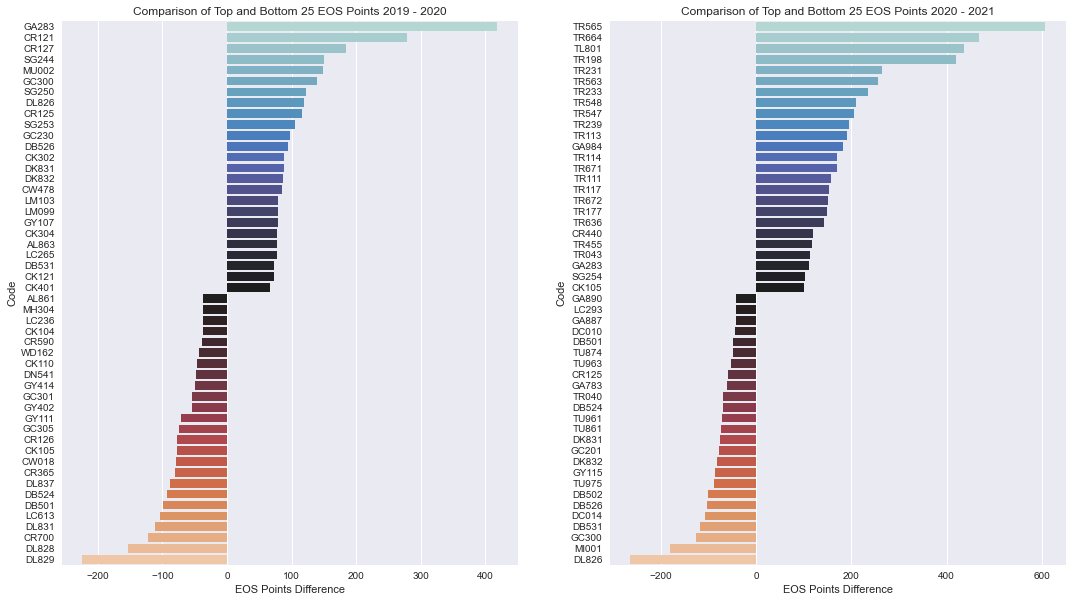

In [108]:
# Define Fig and axes with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

# Create barplot showing difference in EOS Points between 2019 and 2020 in subplot 1.
ax1 = sns.barplot(x="Diff_EOS_19_20", y="Code", data=EOS_hi_lo_2020, palette='icefire', ax=axes[0])
# Set title and labels.
ax1.set_title('Comparison of Top and Bottom 25 EOS Points 2019 - 2020')
ax1.set(xlabel='EOS Points Difference')
# Create barplot showing difference in EOS Points between 2020 and 2021 in subplot 2.
ax2 = sns.barplot(x="Diff_EOS_20_21", y="Code", data=EOS_hi_lo_2021, palette='icefire', ax=axes[1])
# Set title and labels.
ax2.set_title('Comparison of Top and Bottom 25 EOS Points 2020 - 2021')
ax2.set(xlabel='EOS Points Difference')
plt.show()



From the above bar chart we can see in the Comparison of EOS points 2019-2020:
- 10 courses were more than 100 points higher in 2020 when compared to 2019.
- 5 courses were more than 100 points lower in 2020 when compared to 2019.

We we look at the data comparing 2021 to 2020:
- 23 courses were more than 100 points higher in 2021 compared to 2020, interestingly, 18 of these courses were in Trinity.
- 7 courses were more than 100 points lower in 2021 compared to 2020.


In [109]:
# Select relevant data and Drop any rows with NaN in Diff_Mid_19_20
df_Mid_2020 = df_merge[['Code', 'Title', 'Diff_Mid_19_20']].dropna().sort_values(
    by='Diff_Mid_19_20', ascending=False)
# Select relevant data and Drop any rows with NaN in Diff_Mid_20_21
df_Mid_2021 = df_merge[['Code', 'Title', 'Diff_Mid_20_21']].dropna().sort_values(
    by='Diff_Mid_20_21', ascending=False)


In [110]:
# Create new dataframes - 25 courses with highest Mid point difference & 
# 25 courses with lowest Mid point difference for each year.
Mid_hi_lo_2020 = pd.concat([df_Mid_2020.head(25), df_Mid_2020.tail(25)])
Mid_hi_lo_2021 = pd.concat([df_Mid_2021.head(25), df_Mid_2021.tail(25)])

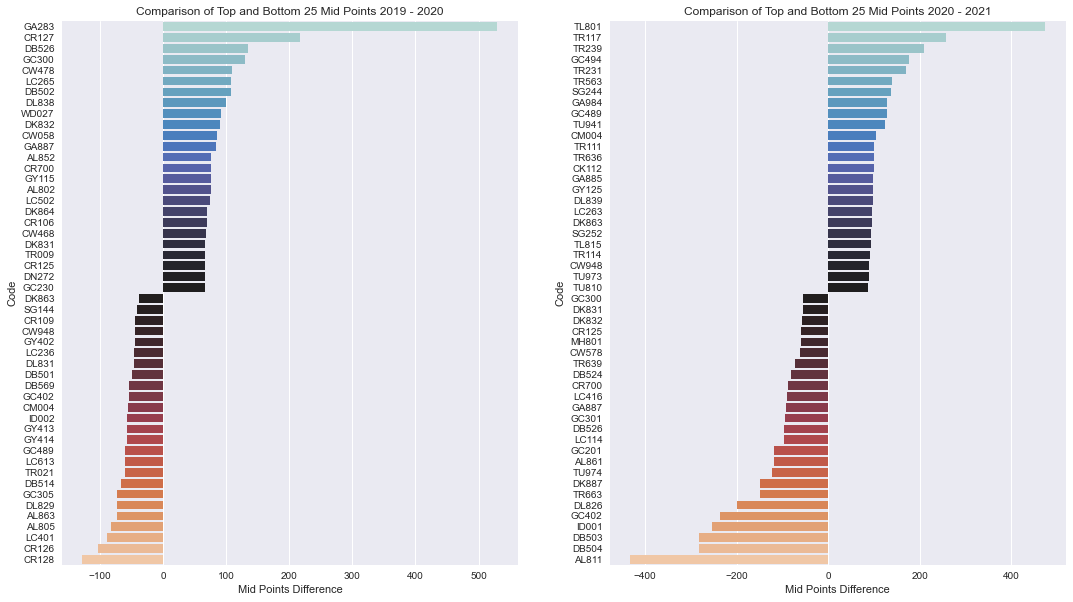

In [111]:
# Define Fig and axes with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)
# Create barplot showing difference in Mid Points between 2019 and 2020 in subplot 1.
ax1 = sns.barplot(x="Diff_Mid_19_20", y="Code", data=Mid_hi_lo_2020, palette='icefire', ax=axes[0])
# Set title and labels.
ax1.set_title('Comparison of Top and Bottom 25 Mid Points 2019 - 2020')
ax1.set(xlabel='Mid Points Difference')
# Create barplot showing difference in Mid Points between 2020 and 2021 in subplot 2.
ax2 = sns.barplot(x="Diff_Mid_20_21", y="Code", data=Mid_hi_lo_2021, palette='icefire', ax=axes[1])
# Set title and labels.
ax2.set_title('Comparison of Top and Bottom 25 Mid Points 2020 - 2021')
ax2.set(xlabel='Mid Points Difference')
plt.show()

When Comparing the Mid  points 2019-2020:
- 7 courses were more than 100 points higher in 2020 when compared to 2019.
- 2 courses were more than 100 points lower in 2020 when compared to 2019.

When we look at the data comparing 2021 to 2020:
- 13 courses were more than 100 points higher in 2021 compared to 2020.
- 11 courses were more than 100 points lower in 2021 compared to 2020.

In [112]:
# Select relevant data and Drop any rows with NaN in Diff_R1_20_21
df_r1_2021 = df_merge[['Code', 'Title', 'Diff_R1_20_21']].dropna().sort_values(
    by='Diff_R1_20_21', ascending=False)

df_r2_2021 = df_merge[['Code', 'Title', 'Diff_R2_20_21']].dropna().sort_values(
    by='Diff_R2_20_21', ascending=False)

In [113]:
# Create new dataframes - 25 courses with highest R1 point difference & 
# 25 courses with lowest R1 point difference and the same for R2.
r1_hi_lo_2021 = pd.concat([df_r1_2021.head(25), df_r1_2021.tail(25)])
r2_hi_lo_2021 = pd.concat([df_r2_2021.head(25), df_r2_2021.tail(25)])

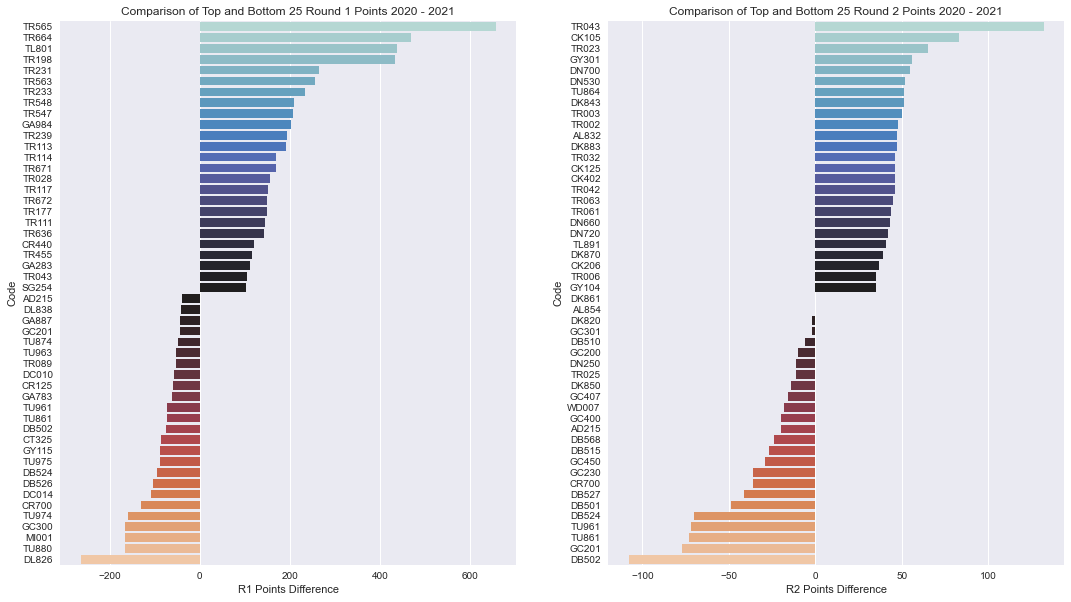

In [114]:
# Define Fig and axes with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)
# Create barplot showing difference in R1 Points between 2020 and 2021 in subplot 1.
ax1 = sns.barplot(x="Diff_R1_20_21", y="Code", data=r1_hi_lo_2021, palette='icefire', ax=axes[0])
# Set title and labels.
ax1.set_title('Comparison of Top and Bottom 25 Round 1 Points 2020 - 2021')
ax1.set(xlabel='R1 Points Difference')

# Create barplot showing difference in R2 Points between 2020 and 2021 in subplot 2.
ax2 = sns.barplot(x="Diff_R2_20_21", y="Code", data=r2_hi_lo_2021, palette='icefire', ax=axes[1])
# Set title and labels.
ax2.set_title('Comparison of Top and Bottom 25 Round 2 Points 2020 - 2021')
ax2.set(xlabel='R2 Points Difference')
plt.show()


When Comparing the Round 1  points 2020-2021:
- 25 courses were more than 100 points higher in 2021 when compared to 2020 - 20 of these courses were at Trinity.
- 8 courses were more than 100 points lower in 2020 when compared to 2019.

When Comparing the Round 2  points 2020-2021:
- 1 course was more than 100 points higher in 2021 compared to 2020.
- 1 course was more than 100 points lower in 2021 compared to 2020.

<br>

***

There is some interesting data to unpack here. Firstly lets consider the two data series which we have data for across the years 2019 - 2021 (EOS and Mid).

For End of Season points (EOS) we see 10 courses rising by more than 100 points between 2019 and 2020. However, between 2020 and 2021 there are 25 courses that had an increase of 100 EOS points or more! Similarly for the Mid score, from 2019 to 2020 we saw 7 courses rising more than 100 points  and from 2020 to 2021 13 courses rose by more than 100 points. What could be driving such a drammatic change?

In 2020, due to the Covid-19 situation in Ireland the Department of Education decided, for the first time in history to use calculated or predicted grades for Leaving Certificate students rather than have them sitting online examinations. The use of predicted grades led to record "grade inflation" in 2020 and 2021 (https://www.irishtimes.com/news/education/evidence-of-leaving-cert-grade-inflation-across-the-board-1.4663221). 

As a result of this grade inflation Higher Education Institutes were forced to increase the required points for courses which were in high demand (https://www.irishtimes.com/news/education/call-to-tackle-cruel-grade-inflation-as-college-points-hit-new-high-1.4667778?mode=sample&auth-failed=1&pw-origin=https%3A%2F%2Fwww.irishtimes.com%2Fnews%2Feducation%2Fcall-to-tackle-cruel-grade-inflation-as-college-points-hit-new-high-1.4667778). Therefore the Round 1 Points, Round 2 Points and EOS points for some courses increased drammatically.

***


### Analysing Points Changes by Higher Education Institute (HEI)

Based on some of the insights we gained in the previous section I wanted to have a look at the points increase across our four variables by institute. Specifically I decided to see if Trinity College Dublin was a huge outlier for End of Season Points. If you recall, 23 out of the top 25 courses with a greater than 100 point increse in EOS points were from Trinity.

In [115]:
# Remind ourselves of the dataframe headings.
df_merge.head()

,Code,Title,Points1_2019,Points2_2019,EOS_2019,Mid_2019,Points1_2020,Points2_2020,EOS_2020,Mid_2020,...,EOS_2021,Mid_2021,Diff_R1_20_21,Diff_R2_20_21,Diff_Mid_19_20,Diff_Mid_20_21,Diff_Mid_19_21,Diff_EOS_19_20,Diff_EOS_20_21,Diff_EOS_19_21
0,AC120,International Business,NaN,NaN,234.0,269.0,209.0,NaN,209.0,280.0,...,294.0,352.0,85.0,NaN,11.0,72.0,83.0,-25.0,85.0,60.0
1,AC137,Liberal Arts,NaN,NaN,252.0,275.0,252.0,NaN,252.0,270.0,...,270.0,334.0,19.0,NaN,-5.0,64.0,59.0,0.0,18.0,18.0
2,AD101,First Year Art & Design (Common Entry),NaN,NaN,NaN,550.0,NaN,NaN,NaN,NaN,...,554.0,604.0,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN
3,AD102,Graphic Design and Moving Image Design,NaN,NaN,NaN,635.0,NaN,NaN,NaN,NaN,...,538.0,625.0,NaN,NaN,NaN,NaN,-10.0,NaN,NaN,NaN
4,AD103,Textile & Surface Design and Jewellery & Objects,NaN,NaN,NaN,545.0,NaN,NaN,NaN,NaN,...,505.0,581.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN


In [116]:
# Split code column and create new column indicating the HEI (Institute)
# Reference: https://stackoverflow.com/questions/63512548/python-split-a-column-into-multiple-columns-no-delimiter-column-yyyymm-to-cou
df_merge['HEI'] = df_merge['Code'].str[:2]

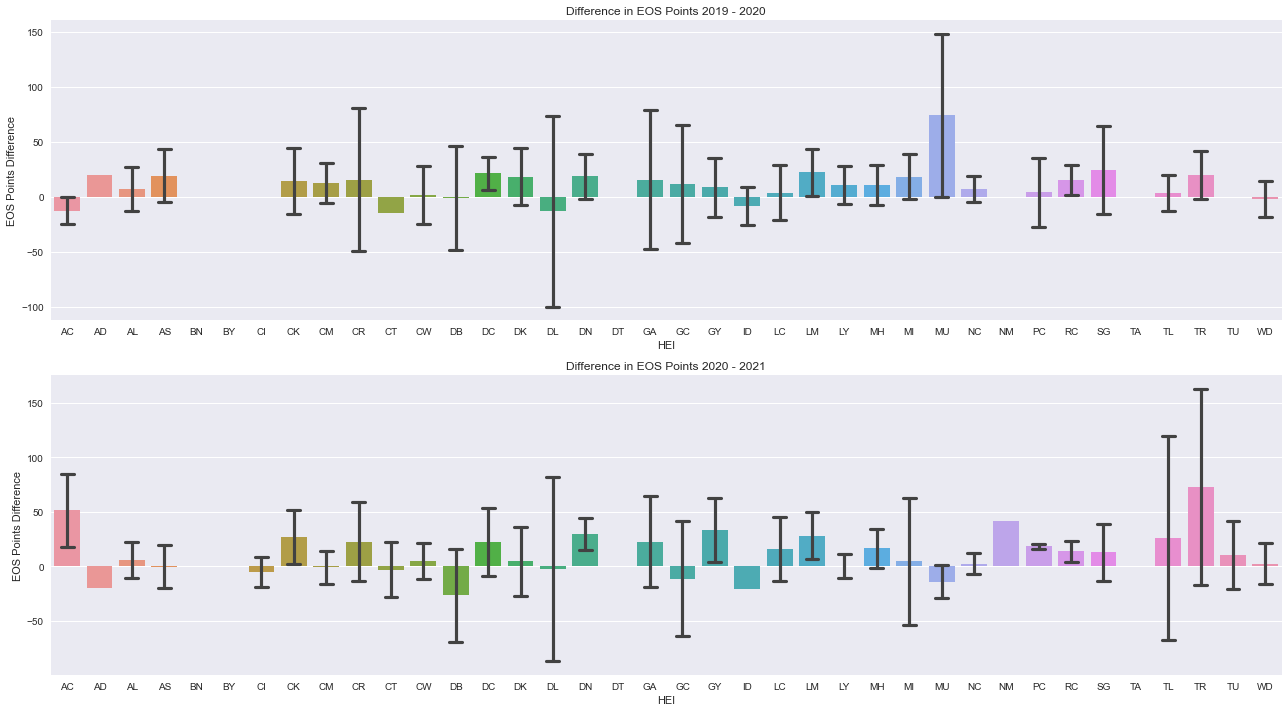

In [117]:
# Define Fig and axes with 2 rows and 1 column
fig, axes = plt.subplots(2,1)
# Create barplot showing difference in EOS Points for each institute between 2019 and 2020 in subplot 1.
ax1 = sns.barplot(x=df_merge['HEI'], y=df_merge['Diff_EOS_19_20'], data=df_merge,
                  capsize=.4, ci='sd', ax=axes[0])
# Set title and labels.
ax1.set_title('Difference in EOS Points 2019 - 2020')
ax1.set(ylabel='EOS Points Difference')

# Create barplot showing difference in EOS Points for each institute between 2020 and 2021 in subplot 2.
ax2 = sns.barplot(x=df_merge['HEI'], y=df_merge['Diff_EOS_20_21'], data=df_merge,
                  capsize=.4, ci='sd', ax=axes[1])
# Set title and labels.
ax2.set_title('Difference in EOS Points 2020 - 2021')
ax2.set(ylabel='EOS Points Difference')

fig.tight_layout()
plt.show()



The bar chart by HEI shows us that from 2019 - 2020 Trinity (TR) was not a particular outlier when we look at the average increase in EOS points. However from 2020 to 2021 Trinity is the HEI with the highest increase in EOS points by quite a margin. This analysis corroborates what Trinity themselves published in September 2021:

> CAO offers show points increase in every discipline in Trinity. There are now 8 courses over 600 points in Trinity

https://trinitynews.ie/2021/09/cao-offers-show-points-increase-in-every-discipline-in-trinity/

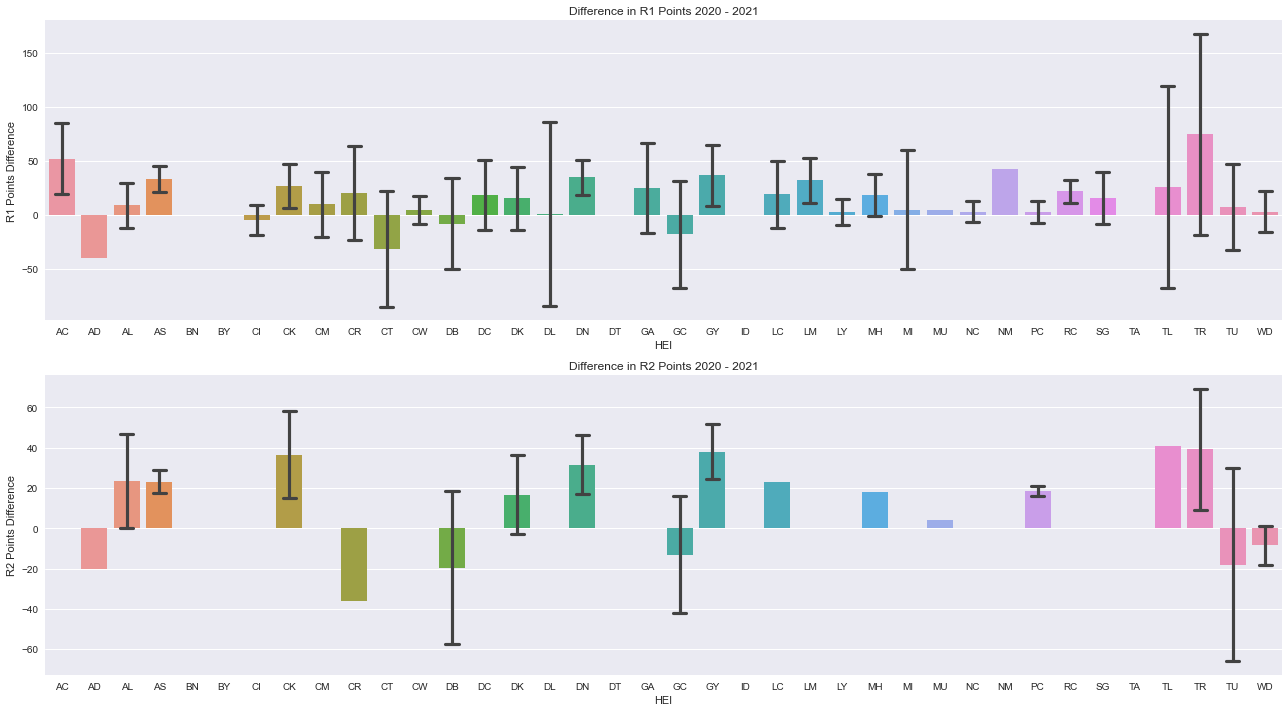

In [119]:
# Define Fig and axes with 2 rows and 1 column
fig, axes = plt.subplots(2,1)
# Create barplot showing difference in R1 Points for each institute between 2020 and 2021 in subplot 1.
ax1 = sns.barplot(x=df_merge['HEI'], y=df_merge['Diff_R1_20_21'], data=df_merge,
                  capsize=.4, ci='sd', ax=axes[0])
# Set title and labels.
ax1.set_title('Difference in R1 Points 2020 - 2021')
ax1.set(ylabel='R1 Points Difference')

# Create barplot showing difference in R2 Points for each institute between 2020 and 2021 in subplot 2.
ax2 = sns.barplot(x=df_merge['HEI'], y=df_merge['Diff_R2_20_21'], data=df_merge,
                  capsize=.4, ci='sd', ax=axes[1])
# Set title and labels.
ax2.set_title('Difference in R2 Points 2020 - 2021')
ax2.set(ylabel='R2 Points Difference')

fig.tight_layout()
plt.show()

A similar picture emerges when we view the Round 1 and Round 2 points increase from 2020 to 2021. Trinity College had the largest round 1 points increase and second largest round 2 points increase out of all the instituions for which we have data.

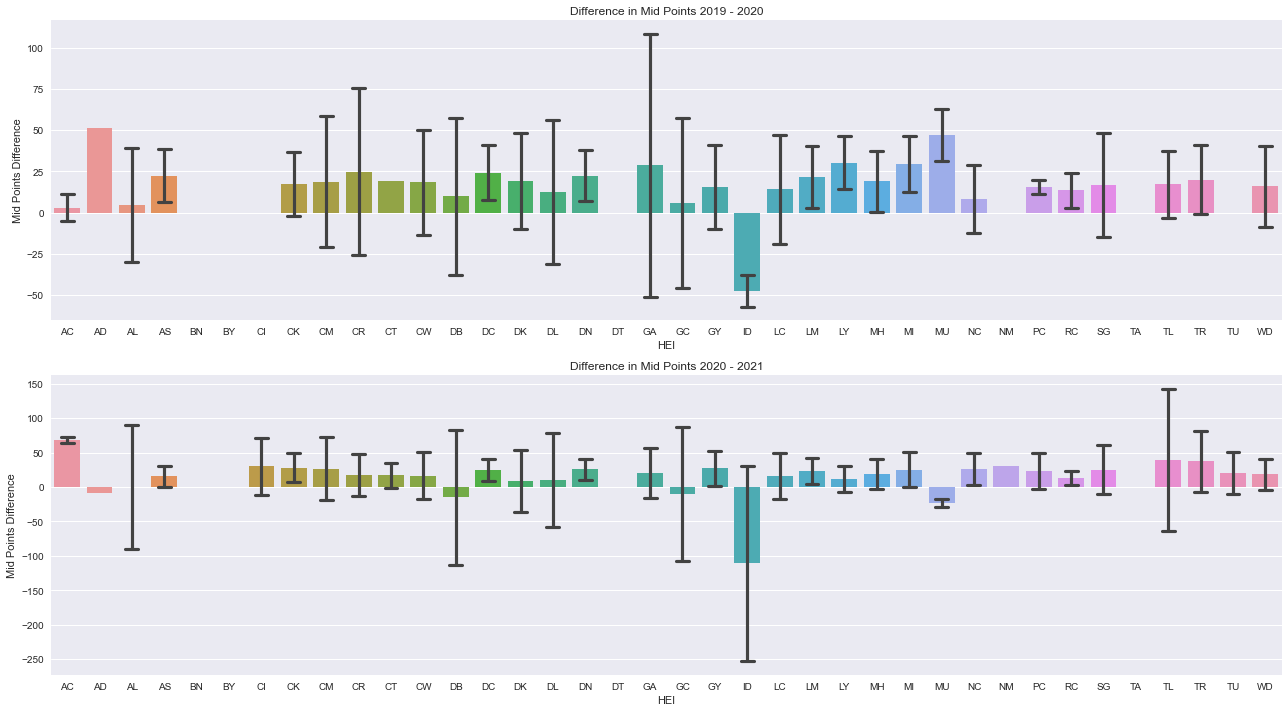

In [118]:
# Define Fig and axes with 2 rows and 1 column
fig, axes = plt.subplots(2,1)
# Create barplot showing difference in Mid Points for each institute between 2019 and 2020 in subplot 1.
ax1 = sns.barplot(x=df_merge['HEI'], y=df_merge['Diff_Mid_19_20'], data=df_merge,
                  capsize=.4, ci='sd', ax=axes[0])
# Set title and labels.
ax1.set_title('Difference in Mid Points 2019 - 2020')
ax1.set(ylabel='Mid Points Difference')

# Create barplot showing difference in Mid Points for each institute between 2020 and 2021 in subplot 2.
ax2 = sns.barplot(x=df_merge['HEI'], y=df_merge['Diff_Mid_20_21'], data=df_merge,
                  capsize=.4, ci='sd', ax=axes[1])
# Set title and labels.
ax2.set_title('Difference in Mid Points 2020 - 2021')
ax2.set(ylabel='Mid Points Difference')

fig.tight_layout()
plt.show()

Unfortunately for students who were applying for Trinity College it would appear that, even with predicted grades, there Mid points increase was not as high as the Round 1, ROund 2 or EOS points increase.

### Correlations

For our final analysis I wanted to see if there were any relationships between the EOS points and the Mid points across the three years in our data set. I dropped Round 1 and Round 2 points for this correlation analysis as, firstly, we only have data for two of the three years and secondly because there would be obvious relationships between Round 1, Round and EOS i.e they are not independent variables.

In [120]:
# Have a peak at the column names.
df_merge.columns

Index(['Code', 'Title', 'Points1_2019', 'Points2_2019', 'EOS_2019', 'Mid_2019',
       'Points1_2020', 'Points2_2020', 'EOS_2020', 'Mid_2020', 'Points1_2021',
       'Points2_2021', 'EOS_2021', 'Mid_2021', 'Diff_R1_20_21',
       'Diff_R2_20_21', 'Diff_Mid_19_20', 'Diff_Mid_20_21', 'Diff_Mid_19_21',
       'Diff_EOS_19_20', 'Diff_EOS_20_21', 'Diff_EOS_19_21', 'HEI'],
      dtype='object')

In [167]:
# Create dataframes for correlation study.
df_2019 = df_merge[['EOS_2019', 'Mid_2019']]

df_2020 = df_merge[['EOS_2020', 'Mid_2020']]

df_2021 = df_merge[['EOS_2021', 'Mid_2021']]


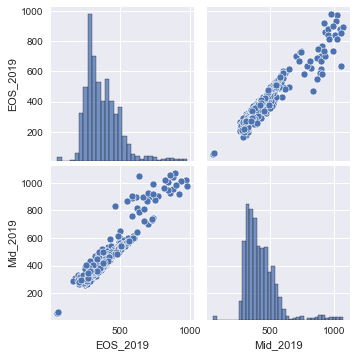

In [168]:
# Plot 2019 pairplot
sns.pairplot(df_2019)
plt.show()

In [171]:
# Define x and y for correlation analysis
x = df_merge['EOS_2019']
y = df_merge['Mid_2019']
# Print out correlation value
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
print(f"2019 EOS to Mid Correlation = : {stats.spearmanr(x, y, nan_policy = 'omit').correlation}")

2019 EOS to Mid Correlation = : 0.9612090453796016


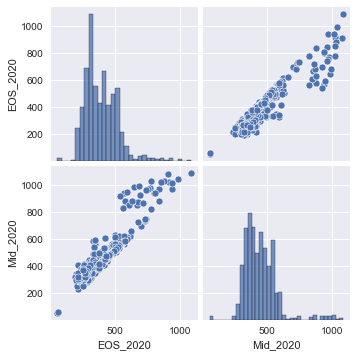

In [172]:
# Plot 2020 pairplot
sns.pairplot(df_2020)
plt.show()

In [173]:
# Define x and y for correlation analysis
x = df_merge['EOS_2020']
y = df_merge['Mid_2020']
# Print out correlation value
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
print(f"2020 EOS to Mid Correlation = : {stats.spearmanr(x, y, nan_policy = 'omit').correlation}")

2020 EOS to Mid Correlation = : 0.9519773667783731


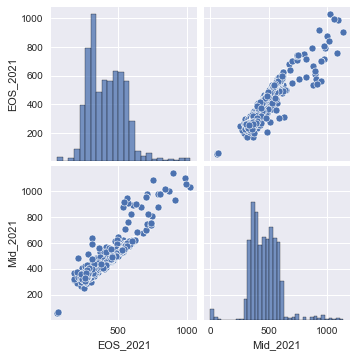

In [174]:
# Plot 2020 pairplot
sns.pairplot(df_2021)
plt.show()

In [165]:
# Define x and y for correlation analysis
x = df_merge['EOS_2021']
y = df_merge['Mid_2021']
# Print out correlation value
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
print(f"2021 EOS to Mid Correlation = : {stats.spearmanr(x, y, nan_policy = 'omit').correlation}")

Correlation = : 0.9576197639165952


### Correlation Summary.

We can see for the three years there are very strong positive correlations between EOS Points and Mid points. It appears that students are selecting CAO points based on their abilities. It should be pointed out that I was not educated in Ireland so I am somewhat unfamiliar with the entire CAO process but, based on my reading, it appears that Irish students are meticulously prepared when it comes to choosing the coorect course based on their acadaemic ability. The Careers Portal website describes some of the preparation which may be performed by the time the CAO courses are chosen:

> By your final year in school, you will have experienced **open days, assessments, psychometric tests,<br>
> careers focussed classes and individual appointments.** Hopefully you have narrowed down your course <br>
> choices and are ready to begin the process of selecting course and putting them in order on the basis <br>
> of preference, content, points, location and duration.

https://careersportal.ie/school/cao_courses.php

## References

[1:Real-Python_REGEX](https://realpython.com/python-web-scraping-practical-introduction/)

[2:StackOverFlow-Iter_lines](https://stackoverflow.com/questions/16870648/python-read-website-data-line-by-line-when-available)

[3:REGEX_Syntax](https://docs.python.org/3/library/re.html)

[4:StackOverFlow-utf-8](https://stackoverflow.com/questions/13110629/decoding-utf-8-strings-in-python)

[5:Understanding_ISO-8859-1](https://mincong.io/2019/04/07/understanding-iso-8859-1-and-utf-8/)
